<h1><center>Data Science Project</center></h1>

<center><img src="https://drive.google.com/uc?id=1yBn2g5h_16b5w2Bv5072OZbiN1rHJW07" width="500"></center>

<center> By Sebastien Mascha & Thomas Le Couedic </center>

# STEP 1 - Formulate the Project Research Framework

### Context

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

**Dataset:**

Link to the dataset: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

Data Source: Kaggle (https://www.kaggle.com)

**Features:**

- enrollee_id : Unique ID for candidate

- city: City code

- city_ development _index : Developement index of the city (scaled)

- gender: Gender of candidate

- relevent_experience: Relevant experience of candidate

- enrolled_university: Type of University course enrolled if any

- education_level: Education level of candidate

- major_discipline :Education major discipline of candidate

- experience: Candidate total experience in years

- company_size: No of employees in current employer's company

- company_type : Type of current employer

- lastnewjob: Difference in years between previous job and current job

- training_hours: training hours completed

- target: 0 – Not looking for job change, 1 – Looking for a job change

**Note:**

- The dataset is imbalanced so it might affect our result if we dont handle it;
- Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality so encoding methods and techniques will help to boost models performance;
- Missing imputation strategy might affect the results so it can be a part of your pipeline as well.


### Preliminary research topic and specific research questions

  **Target Prediction:**
1. Does the number of training hours have an impact on the final decision?
1. Are people with many years of experience and working in a large company more likely to stay in the company?
1. Are young graduates more likely to stay in the company?
1. Are people working in the field of data science but without experience willing to look for a new job?
1. Are people in vocational retraining more willing than others to look for a new job?
1. Are employees already working in the field of data Science more likely to refuse the job?
1. Are people working in an Early Stage Startup more likely to stay in the company?
1. Are undergraduate students not specialised in data science more likely to refuse the job?
1. Are students enrolled in a part-time data science program more likely to decline the offer?
1. To what extent is gender correlated with the target?
1. Are people working in private companies more likely to stay in the company than people working in the public sector?
1. Are people working in highly developed cities with many hours of training more likely to leave their jobs?
1. Are small business employees ready to look for a new job, considering people who are not enrolled in any university?


**Correlation between features:**
14. Do people working in large companies have a high city development index?
1. Do people who left their previous job more than two years ago generally take more hours of training? 
1. Are large companies mostly located in developed cities?
1. Do people with a Master's or PhD degree have fewer hours of training than others? 
1. Are people coming from an underprivileged city and with a high education level looking for a new job?
1. To what extent people without relevant experience will need more training hours?
1. Do people who have taken a major discipline other than STEM take more hours of training?


### Scientific method

The Scientific method stipulates the following sequence of steps:

- Formulation of a research question;
- Proposing a Hypothesis, a conjecture tied to the research question based on the knowledge of the data;
- Prediction helps identify the consequences of the hypothesis;
- Testing involves the process of experimentation to ascertain the validity of the prediction espoused by the hypothesis;
- The final step entails the analysis and interpretation of the prediction and panning the next steps.

The detailed information for Scientific Method can be reviewed on the following website: https://en.wikipedia.org/wiki/Scientific_method


### Data Science Life Cycle

a) Prepare data by using relevant preprocessing transformations, data cleaning, data standardization, dealing with null and outlier values.

b) Balance and resample if required.

c) Conduct Feature Engineering and feature selection.

d) Divide data into test and training set. Use cross validation and bootstrap to avoid
overfitting.

e) Evaluate the first algorithm and its model performance.

f) Evaluate variety of algorithms by creating test harness for diverse algorithms in conjunction
with resampling techniques like cross validation bootstrapping.

g) Improve Result by playing with hyperparameters and innovative methods like ensembles.

h) Choose the best model and present the results.

<br/>

**Questions:**

**To what extend your work experience is correlated to the
city_development_index**

**Is the naive bayes algorithm adapted to our problem?**

**Wich model is the best to predict wether or not a employee is going to leave the company right after the training ?**

**What are the features that have the most impact on the final decision ?**

# STEP 2 - Data Science Analysis

## 2.0 Data collection and preparation

### 2.0.1 Import the libraries

In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

# Visualization tools
import matplotlib as plt
import seaborn as sns
sns.set(style="whitegrid")
# Load matplotlib to work interactively
import matplotlib.pyplot as plt
# This command allow plots to appear within the notebook
%matplotlib inline
#stats tools
from scipy import stats
from scipy.stats import chi2
# --- Machine Learning libraries ---
# Split dataset
from sklearn.model_selection import train_test_split
# Data Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Pipe
from sklearn.pipeline import Pipeline
# Performances
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
# Dimension reduction
from sklearn.decomposition import PCA
# Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
import collections
# Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# Clustering
from sklearn.cluster import KMeans

### 2.0.2 Mount the data volume

In [ ]:
# With Dataiku
# import dataiku
# aug_train = dataiku.Dataset("aug_train")
# aug_test = dataiku.Dataset("aug_test")
# df_train = aug_train.get_dataframe()
# df_test = aug_test.get_dataframe()

# With Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir("/content/drive/MyDrive/Introduction to Data Science - Project/Code/Datasets/HR Analytics")
!ls

Mounted at /content/drive
aug_test.csv   hr      iris.pdf        sample_submission.csv
aug_train.csv  hr.pdf  Log_ROC.png     small_tree.dot
densities.png  iris    rf_pipe.joblib  tree.png


### 2.0.3 Import the data set

In [ ]:
df_train = pd.read_csv('aug_train.csv')
#df_test = pd.read_csv('aug_test.csv')
print(f'Shape: {df_train.shape}')
print(f'\nDuplicated values: {df_train.isnull().values.any()}')
df_train.head()

Shape: (19158, 14)

Duplicated values: True


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### 2.0.4 Data Cleaning

**Delete useless column: enrolled_id and drop NA values in experience and last_new_job column to convert it in integer / float**



In [ ]:
#the ID is a unique value --> we prefer to remove this column, which will not affect our algorithms.
df_train.drop(['enrollee_id'], axis='columns', inplace=True)
#experience and last_new_job are numerical varibles
#here we drop the na values to convert it in integer / float after
df_train.dropna(subset=['experience','last_new_job'], inplace=True)

### 2.0.5 Data Standardization

**Change some values to obtain consistency between the values in column**

In [ ]:
#remove the first 5 caracters "city_" to keep only the id
df_train['city'] = df_train['city'].str[5:]
#obtain consistency in company_size column
df_train['company_size'] = df_train['company_size'].replace('10/49', '10-49')
df_train['company_size'] = df_train['company_size'].replace('<10', '1-9')
df_train['company_size'] = df_train['company_size'].replace('10000+', '10000-20000')
#this two lines allows us to deal with numerical values for the experience column
df_train['experience'] = df_train['experience'].replace('<1', '0.5')
df_train['experience'] = df_train['experience'].replace('>20', '28')
#same here
df_train['last_new_job'] = df_train['last_new_job'].replace('never', '0')
df_train['last_new_job'] = df_train['last_new_job'].replace('>4', '6')

df_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,28,NaN,NaN,1,36,1.0
1,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,6,47,0.0
2,21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0.0
3,115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.5,NaN,Pvt Ltd,0,52,1.0
4,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,28,50-99,Funded Startup,4,8,0.0


### 2.0.6 Data Transformation

**Create categorical variables by creating new columns for experience and lastnewjob**

In [ ]:
# Create a new column for categorical data
map_dictionary_experience ={'0.5':"Junior",'1':"Junior",'2' : "Junior", '3' : "Junior", '4' :"Junior", '5' : "Confirmed", '6' : "Confirmed", '7' :"Confirmed", '8' : "Confirmed", '9' :"Confirmed", '10' : "Confirmed", '11' :"Senior",'12' : "Senior", '13' :"Senior",'14' : "Senior", '15' :"Senior", '16' : "Senior", '17' :"Senior", '18' : "Senior", '19' :"Senior",'20' : "Senior", '28' :"Senior"} 
df_train['experience_categorical'] = df_train['experience'].map(map_dictionary_experience) 
# Type data: numerical and categorical
df_train['experience_categorical'] = pd.Categorical(df_train.experience_categorical)
df_train['experience'] = df_train['experience'].astype(float) #convert to float

# Create a new column for categorical data
map_dictionary_lastnewjob ={'1':"Short",'2':"Medium",'3' : "Long", '4' : "Long", '6':"Long", '0':"Never"} 
df_train['last_new_job_categorical'] = df_train['last_new_job'].map(map_dictionary_lastnewjob) 
# Type data: numerical and categorical
df_train['last_new_job_categorical'] = pd.Categorical(df_train.last_new_job_categorical)
df_train['last_new_job'] = df_train['last_new_job'].astype(int) #convert to int

df_train['target'] = df_train['target'].astype(int) #convert to int
df_train['city'] = df_train['city'].astype(int) #convert to int


#reorder properly the columns
df_train = df_train[['city','city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','experience_categorical','company_size','company_type','last_new_job','last_new_job_categorical','training_hours','target']]

df_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,experience_categorical,company_size,company_type,last_new_job,last_new_job_categorical,training_hours,target
0,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,28.0,Senior,NaN,NaN,1,Short,36,1
1,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,Senior,50-99,Pvt Ltd,6,Long,47,0
2,21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,Confirmed,NaN,NaN,0,Never,83,0
3,115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.5,Junior,NaN,Pvt Ltd,0,Never,52,1
4,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,28.0,Senior,50-99,Funded Startup,4,Long,8,0


**Typing**

**Target and city are categorcial variables**

In [ ]:
#change the type of those two variables
df_train['target'] = pd.Categorical(df_train.target)
df_train['city'] = pd.Categorical(df_train.city)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18694 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   city                      18694 non-null  category
 1   city_development_index    18694 non-null  float64 
 2   gender                    14564 non-null  object  
 3   relevent_experience       18694 non-null  object  
 4   enrolled_university       18345 non-null  object  
 5   education_level           18280 non-null  object  
 6   major_discipline          16007 non-null  object  
 7   experience                18694 non-null  float64 
 8   experience_categorical    18694 non-null  category
 9   company_size              12977 non-null  object  
 10  company_type              12816 non-null  object  
 11  last_new_job              18694 non-null  int64   
 12  last_new_job_categorical  18694 non-null  category
 13  training_hours            18694 non-null  int6

## 2.1 Descriptive Statistics

### 2.1.0 Sample Information

In [ ]:
def descriptive_statistics(df, all = False):
    print(f'\nShape: {df.shape}')
    print(f'\nDTypes - Numerics')
    print(df.select_dtypes(include=np.number).columns.tolist())
    print(f'\nDTypes - Categoricals')
    num_cols = df._get_numeric_data().columns
    print(list(set(df.columns) - set(num_cols)))
    print('\nColumn information: \n')
    print(df.info())
    if all:
        print(f'\nDTypes - Numerics')
        print(df.describe(include=[np.number]))
        print(f'\nDTypes - Categoricals')
        print(df.describe(include=['object']))

descriptive_statistics(df=df_train, all=True)


Shape: (18694, 15)

DTypes - Numerics
['city_development_index', 'experience', 'last_new_job', 'training_hours']

DTypes - Categoricals
['education_level', 'city', 'gender', 'company_type', 'target', 'experience_categorical', 'enrolled_university', 'company_size', 'major_discipline', 'last_new_job_categorical', 'relevent_experience']

Column information: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18694 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   city                      18694 non-null  category
 1   city_development_index    18694 non-null  float64 
 2   gender                    14564 non-null  object  
 3   relevent_experience       18694 non-null  object  
 4   enrolled_university       18345 non-null  object  
 5   education_level           18280 non-null  object  
 6   major_discipline          16007 non-null  object  
 7   experience            

Among these 14 features, we distinguish on the one hand the categorical variables and on the other hand the quantitative variables.

**Categorical variables:**

Ordinal variables:
- education_level
- company_size
- experience
- last_new_job
- last_new_job_categorical
- experience_categorical

Nominal variables:
- gender
- enrolled_university
- company_type
- major_discipline
- city
- target

<br/>

**Quantitative variables:**
- city_development_index
- training_hours
- experience
- last_new_job
- relevent_experience


### 2.1.1 Numerical Summaries

#### Frequency distribution

Let's look at the frequency of each category separated the histogram charts to check if there is any special information to distinguish whether the result of the "target" is 0 - Not looking for job change, OR, 1 - Looking for a job change.

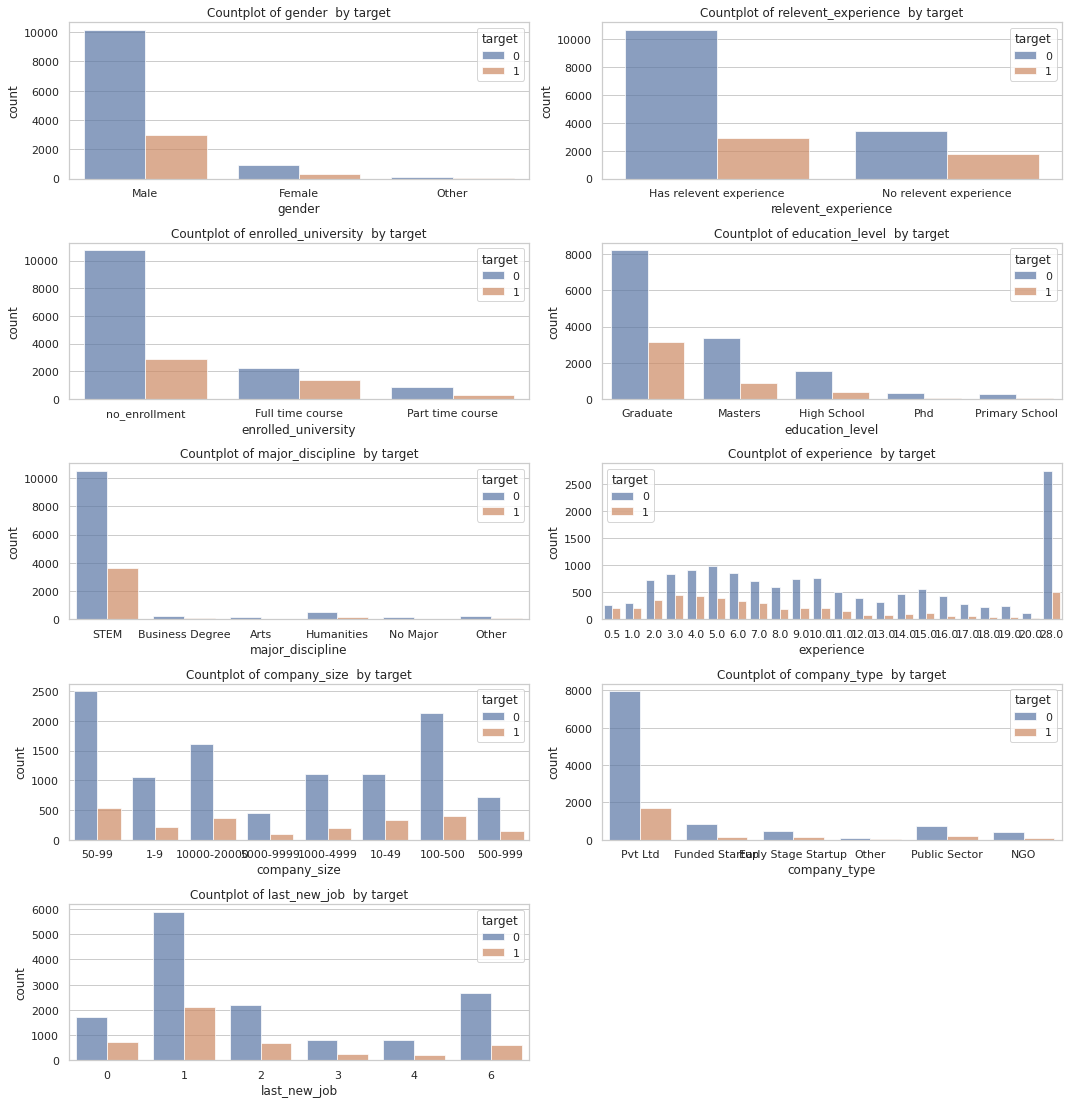

In [ ]:
# Frequency of each category separated by label
plt.figure(figsize=[15,18])
feafures = ['gender','relevent_experience','enrolled_university','education_level', 'major_discipline',
       'experience','company_size','company_type','last_new_job']
n=1
for f in feafures:
    plt.subplot(6,2,n)
    sns.countplot(x=f, hue='target', alpha=0.7, data=df_train)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

In [ ]:
def get_frequency_distribution(column: str):
    print('\n----------')
    print('Column: ' + column)
    column_total = sum(df_train[column].value_counts())
    return df_train[column].value_counts()

print(get_frequency_distribution('gender'))
print(get_frequency_distribution('enrolled_university'))
print(get_frequency_distribution('education_level')) 
print(get_frequency_distribution('major_discipline'))
print(get_frequency_distribution('company_type'))
print(get_frequency_distribution('last_new_job_categorical'))
print(get_frequency_distribution('experience_categorical'))
print(get_frequency_distribution('company_size'))
print(get_frequency_distribution('city'))

def get_proportions(column: str):
    print('\n----------')
    print('Column: ' + column)
    column_total = sum(df_train[column].value_counts())
    return df_train[column].value_counts()/column_total*100

print(get_proportions('gender'))
print(get_proportions('enrolled_university'))
print(get_proportions('education_level'))
print(get_proportions('major_discipline'))
print(get_proportions('company_type'))
print(get_proportions('last_new_job_categorical'))
print(get_proportions('experience_categorical'))
print(get_proportions('company_size'))


----------
Column: gender
Male      13144
Female     1232
Other       188
Name: gender, dtype: int64

----------
Column: enrolled_university
no_enrollment       13600
Full time course     3578
Part time course     1167
Name: enrolled_university, dtype: int64

----------
Column: education_level
Graduate          11347
Masters            4278
High School        1951
Phd                 405
Primary School      299
Name: education_level, dtype: int64

----------
Column: major_discipline
STEM               14187
Humanities           662
Other                368
Business Degree      324
Arts                 250
No Major             216
Name: major_discipline, dtype: int64

----------
Column: company_type
Pvt Ltd                9680
Funded Startup          990
Public Sector           935
Early Stage Startup     584
NGO                     511
Other                   116
Name: company_type, dtype: int64

----------
Column: last_new_job_categorical
Short     8019
Long      5334
Medium    2897


From these histogram charts, it can be seen, there is no special correlation between the variables with the target function to distinguish the value of the target. Furthermore, categorical variables cannot determine the correlation factor between these variables and the target function.

<br/>

Regarding last_new_job_categorical, we can say that on the whole it is balanced, but we can see that there is still a majority of people who did not take a long time to find their current job.

Regarding experience_categorical, it is really balanced with a small majority of seniors.

#### Density 

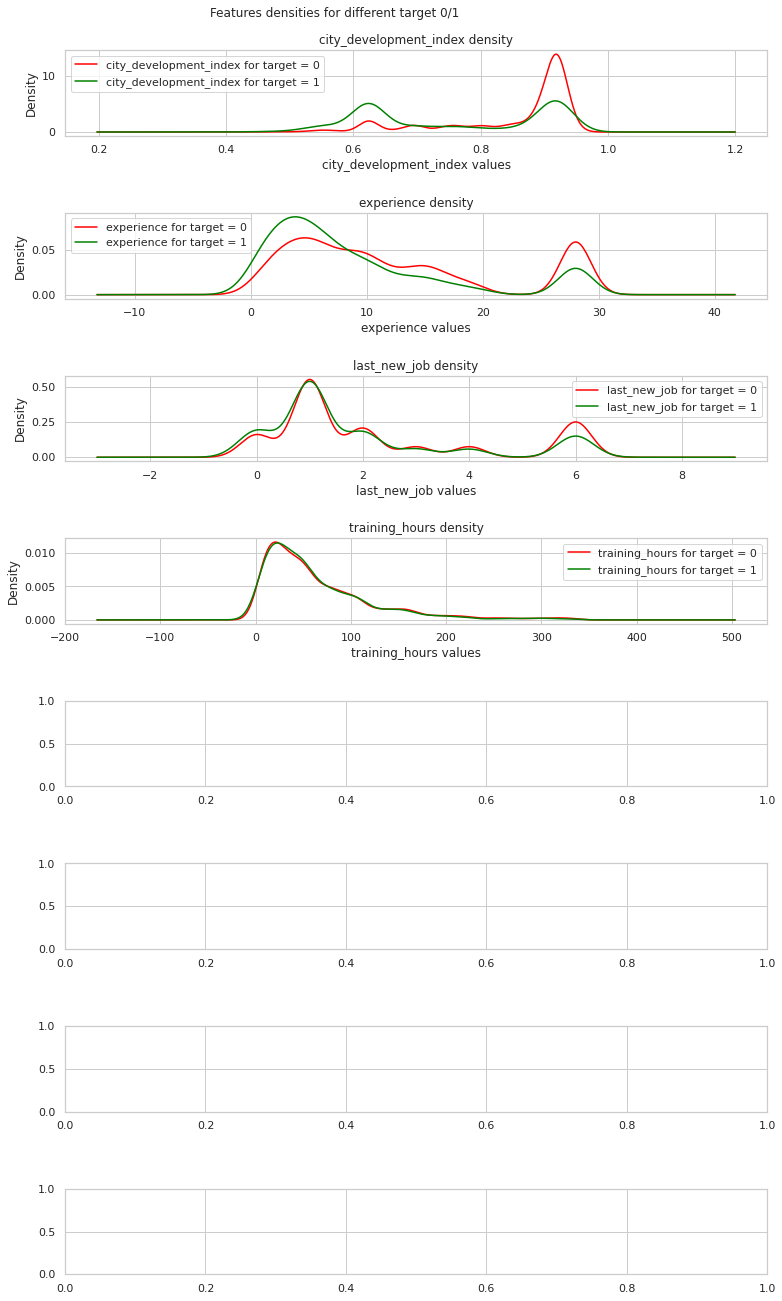

In [ ]:
def plot_densities(data, outcome_name: str):
    '''
    Plot features densities depending on the outcome values
    '''
    from pylab import rcParams

    names = list(data.columns)

    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on outcome values 
    outcome_0 = data[data[outcome_name] == 0]
    outcome_1 = data[data[outcome_name] == 1]

    # init figure
    columns_number = len(names) - 1 
    fig, axs = plt.subplots(8, 1)
    fig.suptitle('Features densities for different ' + outcome_name + ' 0/1')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)

    # plot densities for outcomes
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for ' + outcome_name + ' = 0')
        outcome_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for ' + outcome_name + ' = 1')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.show()
    
plot_densities(data=df_train[['city_development_index', 'experience', 'last_new_job', 'training_hours', 'target']], outcome_name='target')

#### Contingency tables

In the next cells we print different relevant contingency tables

relevent_experience / target.


In [ ]:
data_crosstab = pd.crosstab(df_train['relevent_experience'], df_train['target'], margins=True) 
print(data_crosstab.sort_values(by=[0.0, 1.0]))

target                       0     1    All
relevent_experience                        
No relevent experience    3418  1734   5152
Has relevent experience  10669  2873  13542
All                      14087  4607  18694


training_hours / target.



In [ ]:
data_crosstab = pd.crosstab(df_train['training_hours'], df_train['target'], margins=True) 
print(data_crosstab.sort_values(by=[0.0, 1.0]))

target              0     1    All
training_hours                    
286                 2     3      5
270                 3     3      6
228                 3     4      7
238                 4     0      4
272                 4     1      5
...               ...   ...    ...
18                208    72    280
22                217    61    278
12                222    59    281
28                245    73    318
All             14087  4607  18694

[242 rows x 3 columns]


enrolled_university / target

In [ ]:
data_crosstab = pd.crosstab(df_train['enrolled_university'], df_train['target'], margins=True) 
print(data_crosstab.sort_values(by=[0.0, 1.0]))

target                   0     1    All
enrolled_university                    
Part time course       880   287   1167
Full time course      2222  1356   3578
no_enrollment        10745  2855  13600
All                  13847  4498  18345


education_level / target

In [ ]:
data_crosstab = pd.crosstab(df_train['education_level'], df_train['target'], margins=True) 
print(data_crosstab.sort_values(by=[0.0, 1.0]))

target               0     1    All
education_level                    
Primary School     261    38    299
Phd                349    56    405
High School       1571   380   1951
Masters           3374   904   4278
Graduate          8210  3137  11347
All              13765  4515  18280


last_new_job / target

In [ ]:
data_crosstab = pd.crosstab(df_train['last_new_job'], df_train['target'], margins=True) 
print(data_crosstab.sort_values(by=[0.0, 1.0]))

target            0     1    All
last_new_job                    
3               792   231   1023
4               801   227   1028
0              1706   738   2444
2              2198   699   2897
6              2687   596   3283
1              5903  2116   8019
All           14087  4607  18694


experience / target

In [ ]:
data_crosstab = pd.crosstab(df_train['experience'], df_train['target'], margins=True) 
print(data_crosstab.sort_values(by=[0.0, 1.0]))

target          0     1    All
experience                    
20.0          114    33    147
18.0          235    41    276
19.0          249    50    299
0.5           266   218    484
17.0          283    57    340
1.0           302   215    517
13.0          317    77    394
12.0          397    91    488
16.0          429    71    500
14.0          476   106    582
11.0          510   149    659
15.0          571   113    684
8.0           597   193    790
7.0           713   300   1013
2.0           732   358   1090
9.0           757   208    965
10.0          772   205    977
3.0           846   450   1296
6.0           857   337   1194
4.0           917   433   1350
5.0           993   403   1396
28.0         2754   499   3253
All         14087  4607  18694


In [ ]:
print(df_train.describe())
quantitative_columns = ['city_development_index','training_hours','experience','last_new_job']
for i in quantitative_columns :
  print('Mode of ' + str(i) + ' is :' + str(df_train[i].mode()))
print('------------------------------------')
for j in quantitative_columns:
  Q1 = df_train[j].quantile(0.25)
  Q3 = df_train[j].quantile(0.75)
  print('Interquartile range ' + str(j) + ' is :' + str(Q3 - Q1))
print('------------------------------------')
for k in quantitative_columns :
  max = df_train[k].max()
  min = df_train[k].min()
  print('Range ' + str(k) + ' is :' + str(max - min))
print('------------------------------------')
for l in quantitative_columns :
  mean = df_train[l].mean()
  std = df_train[l].std()
  print('Coefficient of Variation ' + str(l) + ' is :' + str(mean/std))

       city_development_index    experience  last_new_job  training_hours
count            18694.000000  18694.000000  18694.000000    18694.000000
mean                 0.830275     11.411415      2.176741       65.471488
std                  0.122703      8.883573      2.001364       60.100561
min                  0.448000      0.500000      0.000000        1.000000
25%                  0.743000      4.000000      1.000000       23.000000
50%                  0.910000      9.000000      1.000000       47.000000
75%                  0.920000     16.000000      3.000000       88.000000
max                  0.949000     28.000000      6.000000      336.000000
Mode of city_development_index is :0    0.92
dtype: float64
Mode of training_hours is :0    28
dtype: int64
Mode of experience is :0    28.0
dtype: float64
Mode of last_new_job is :0    1
dtype: int64
------------------------------------
Interquartile range city_development_index is :0.17700000000000005
Interquartile range training_

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

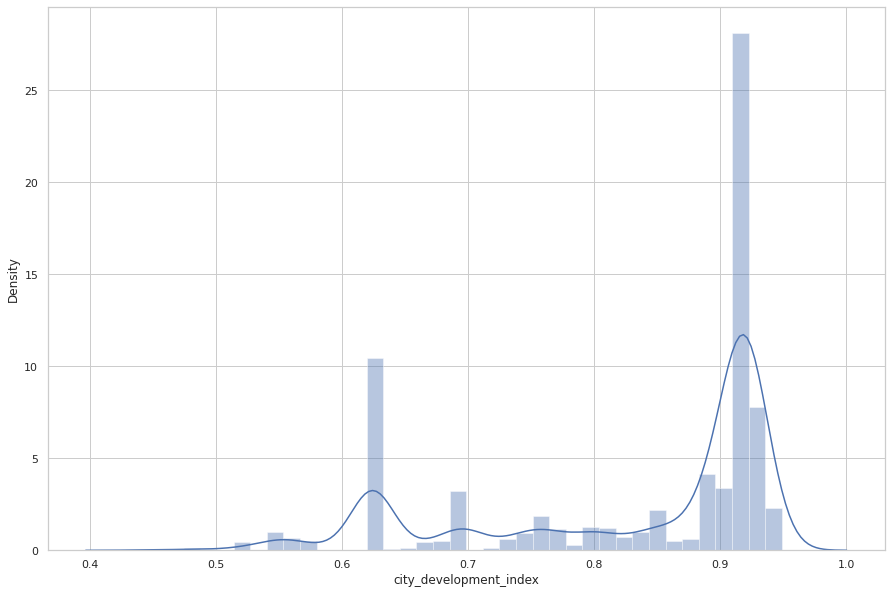

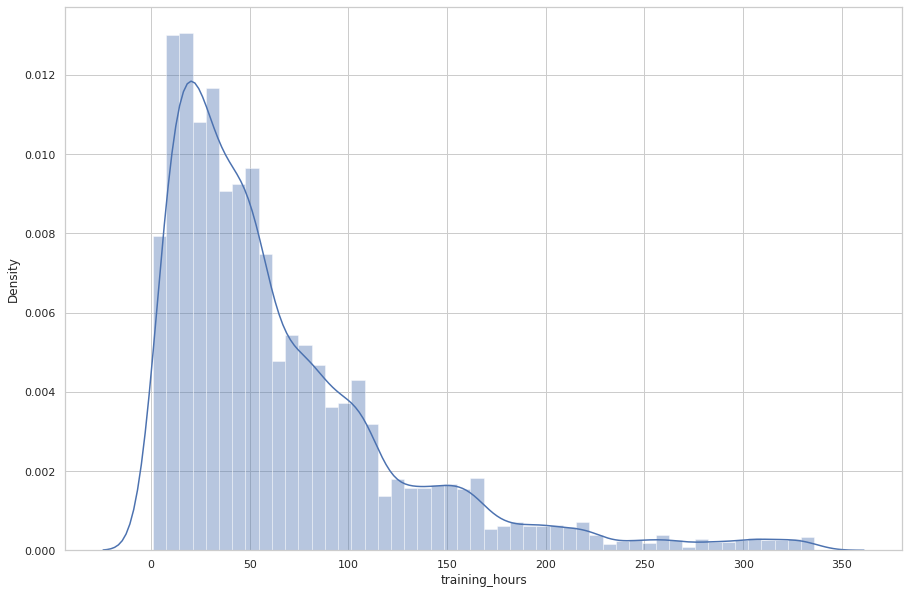

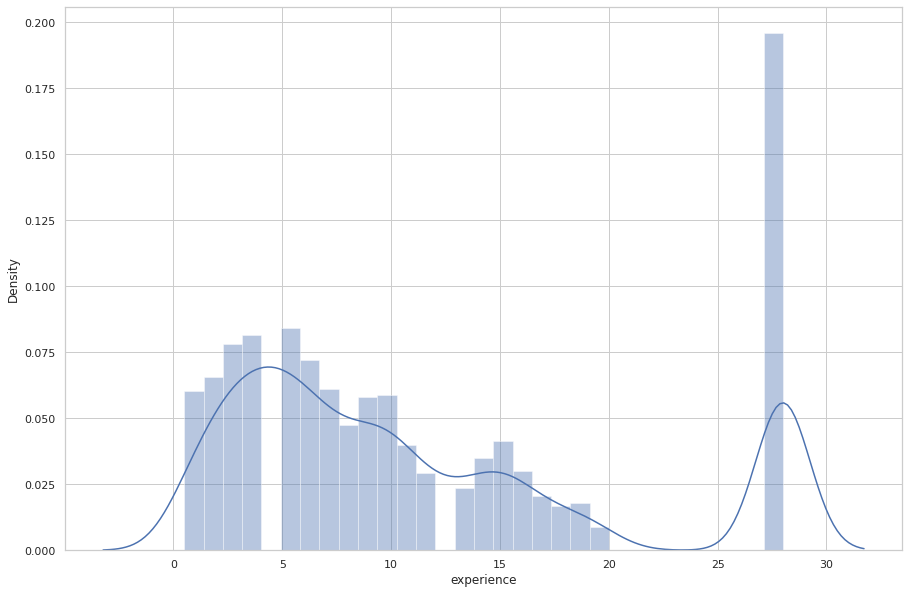

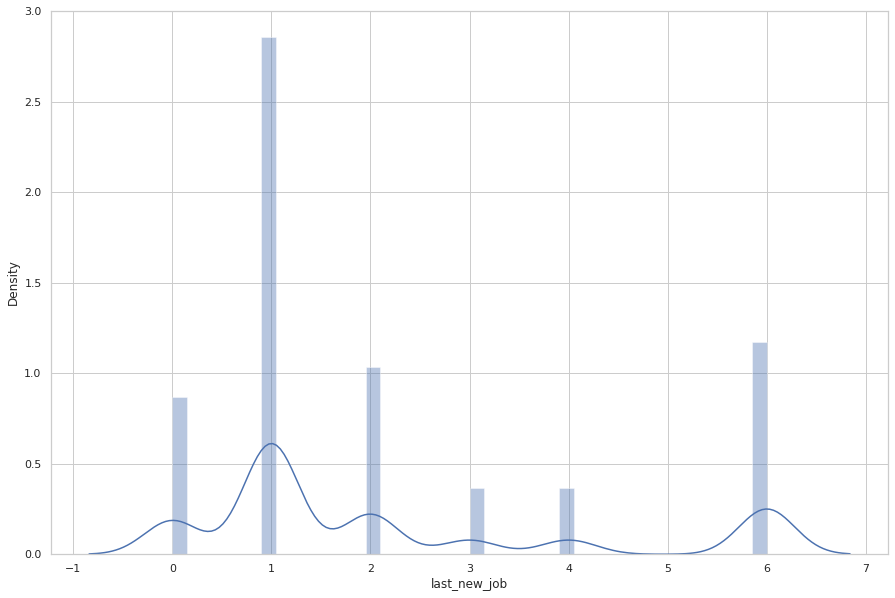

In [ ]:
quantitative_columns_bis = ['city_development_index','training_hours','experience','last_new_job']
for m in quantitative_columns_bis : 
  plt.figure(figsize=(15,10))
  plt.tight_layout()
  sns.distplot(df_train[m])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


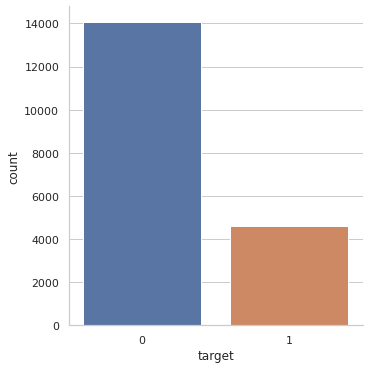

In [ ]:
#to observe that the data is imbalanced
target_repartition = sns.catplot("target", data=df_train, kind="count")

### 2.1.2 Graphical Summaries

**Categorical variables**

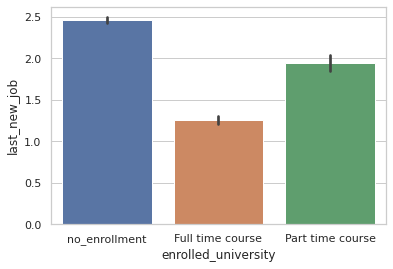

In [ ]:
fig_dims = (6, 4)
fig, axs = plt.subplots(figsize=fig_dims)
bar_plot_1 = sns.barplot(x="enrolled_university", y="last_new_job", data=df_train)

This barplot shows us, considering our study, that the people without any enrollment took on average more time to find their actual job then those who are following courses.

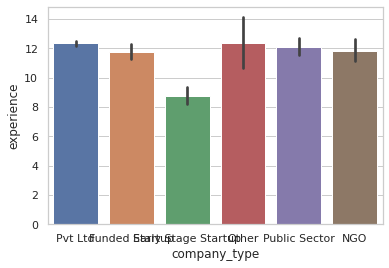

In [ ]:
fig_dims = (6, 4)
fig, axs = plt.subplots(figsize=fig_dims)
bar_plot_2 = sns.barplot(x="company_type", y='experience', data=df_train)

This barplot shows us, considering our study, that startup employees have less experience than employees from other company types. We can deduce from this graph that it is rather people who are starting or just beginning their professional career who are entering the world of startup and innovation.

**Quantitative variables**

**boxplots and histograms and distplots**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


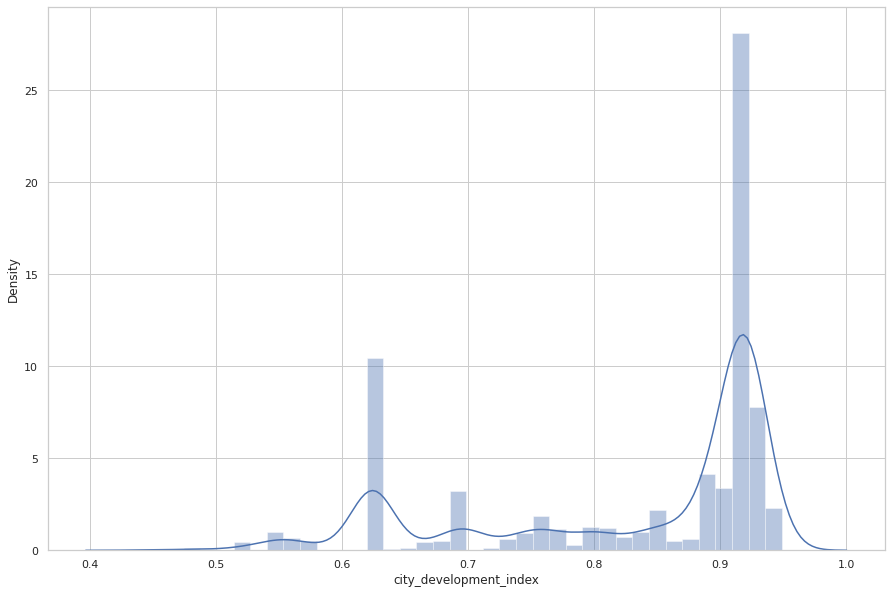

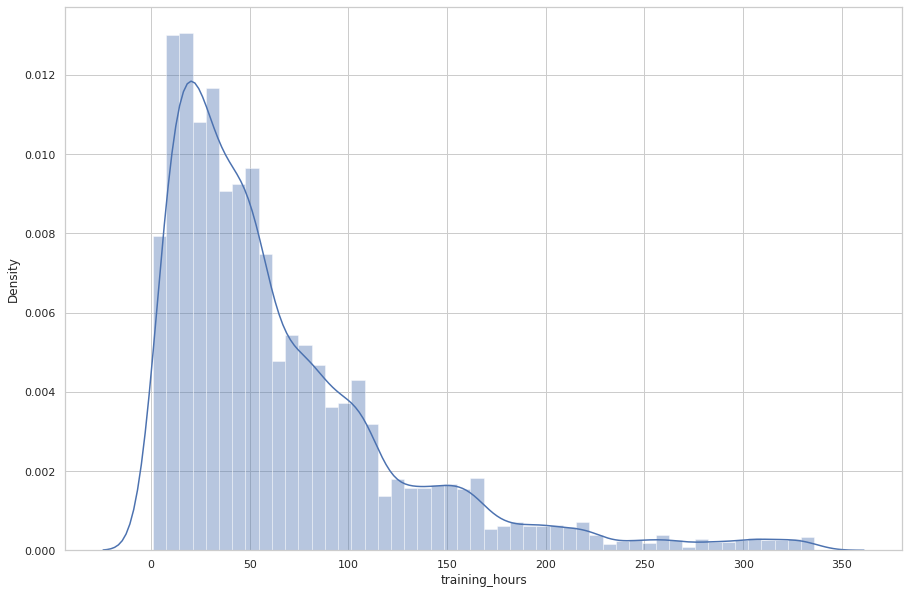

In [ ]:
quantitative_var = ['city_development_index','training_hours']
for m in quantitative_var : 
  plt.figure(figsize=(15,10))
  plt.tight_layout()
  sns.distplot(df_train[m])

We can observe here that the distribution of city_development_index is right-skewed, and that the distribution of training_hours is left-skewed.

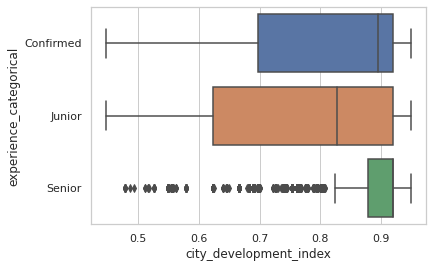

In [ ]:
fig_dims = (6, 4)
fig, axs = plt.subplots(figsize=fig_dims)
box_plot_1 = sns.boxplot(x='city_development_index',y='experience_categorical',data=df_train)

This boxplot allows us to highlight that the people with a lot of experience are living essentially in developed cities whereas for Junior and Confirmed the distribution is more dispersed and on average they live in slightly less developed cities than Senior.

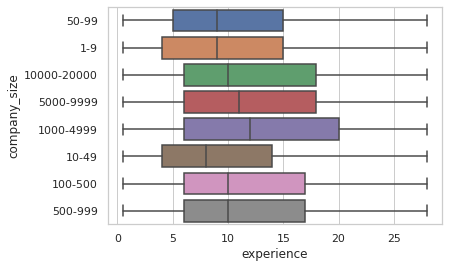

In [ ]:
fig_dims = (6, 4)
fig, axs = plt.subplots(figsize=fig_dims)
boxplot_2 = sns.boxplot(x='experience',y='company_size',data=df_train)

This boxplot allows us to highlight that it is in large companies that the average professional experience is highest and where the interquartile range is greatest. In smaller companies, such as start-ups, there are people with less experience, it might be young graduates, for example.

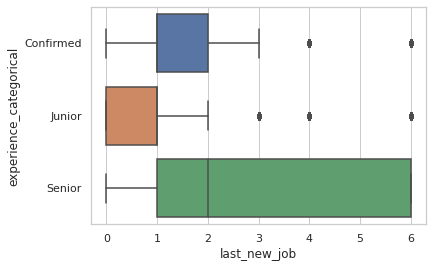

In [ ]:
fig_dims = (6, 4)
fig, axs = plt.subplots(figsize=fig_dims)
boxplot_3 = sns.boxplot(x='last_new_job',y='experience_categorical',data=df_train)

We can notice on this boxplot that the more we advance in our career and the more professional experience we have, the longer it took us to find the job we currently have.

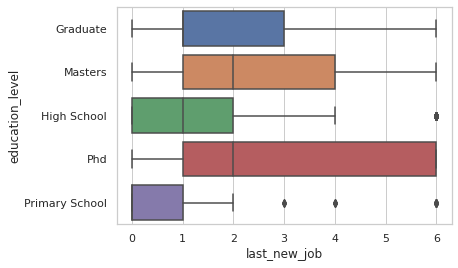

In [ ]:
fig_dims = (6, 4)
fig, axs = plt.subplots(figsize=fig_dims)
boxplot = sns.boxplot(x='last_new_job',y='education_level',data=df_train)

We can notice on this graph a lot of heterogeneity. What is relevant is the large interval for PhDs which may be due to the fact that these employees started their professional career and then decided to do a thesis in the course of their professional career which would explain the particular shape of this red box.

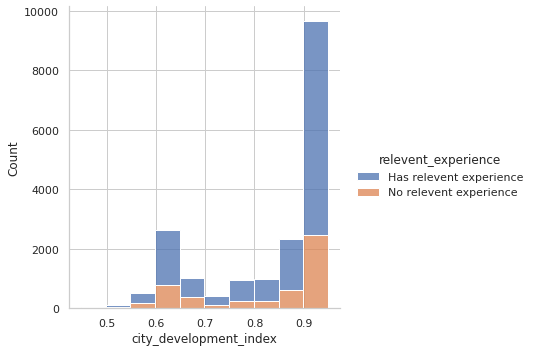

In [ ]:
histogram_1 = sns.displot(df_train, x="city_development_index", bins = 10,multiple="stack", hue='relevent_experience')

We can see on that histogram, that no matter the city_develoment_index, the proportions of people with relevant experience and without relevant experience remain the same.

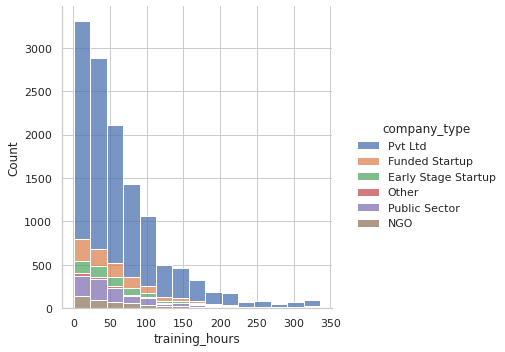

In [ ]:
histogram_2 = sns.displot(df_train, x="training_hours", bins = 15, multiple="stack", hue='company_type')

In a first place, we can notice thanks to this histogram, that the dominant type of company is the Private Limited Company. In a second place, we can say that the company type proportion remains similar in all bins of training_hours.

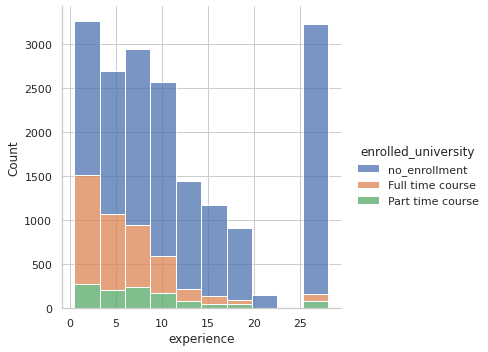

In [ ]:
histogram_3 = sns.displot(df_train, x="experience", bins = 10,multiple="stack", hue='enrolled_university')

We can see on that histogram, that the more work experience people have, the less they are enrolled in full time or part time course.

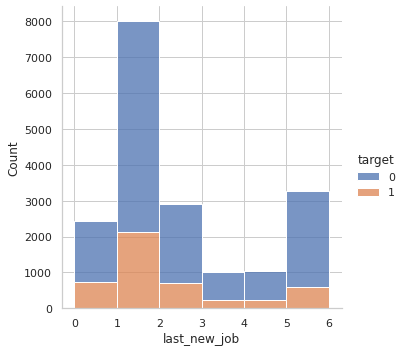

In [ ]:
histogram_4 = sns.displot(df_train, x="last_new_job", bins = 6, multiple="stack", hue='target')

We can notice that people who did not take a long time to find their current job are more likely to change jobs than those who took a long time to find their current job.

## 2.2 Correlation and Regression

### 2.2.1 - Compute the coefficient of correlation between all attributes

In [ ]:
#compute corr_data
Corr_Data = df_train[[
    'city_development_index', 
    'experience', 
    'last_new_job',
    'training_hours',
]]
skew = Corr_Data.skew()
skew

city_development_index   -1.021975
experience                0.852409
last_new_job              1.014353
training_hours            1.816327
dtype: float64

In [ ]:
#compute correlation matric
df_train_cov = df_train.cov()
df_train_cov

,city_development_index,experience,last_new_job,training_hours
city_development_index,0.015056,0.349297,0.045430,0.004804
experience,0.349297,78.917873,8.349419,-0.436672
last_new_job,0.045430,8.349419,4.005459,-0.845546
training_hours,0.004804,-0.436672,-0.845546,3612.077478


In [ ]:
df_train_pearsonCorr = Corr_Data.corr(method='pearson')
df_train_pearsonCorr

,city_development_index,experience,last_new_job,training_hours
city_development_index,1.000000,0.320444,0.184997,0.000651
experience,0.320444,1.000000,0.469615,-0.000818
last_new_job,0.184997,0.469615,1.000000,-0.007030
training_hours,0.000651,-0.000818,-0.007030,1.000000


### 2.2.2 - Visualize the correlation between the different variables

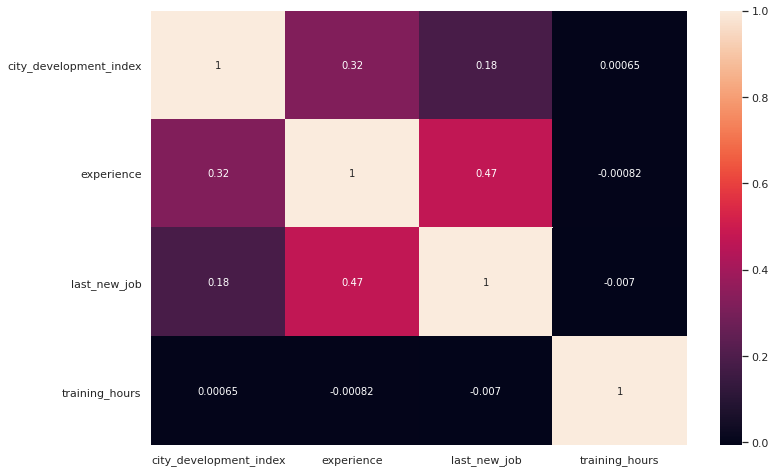

In [ ]:
figure,axe = plt.subplots(figsize=(12,8))
sns.heatmap(df_train_pearsonCorr, annot=True)

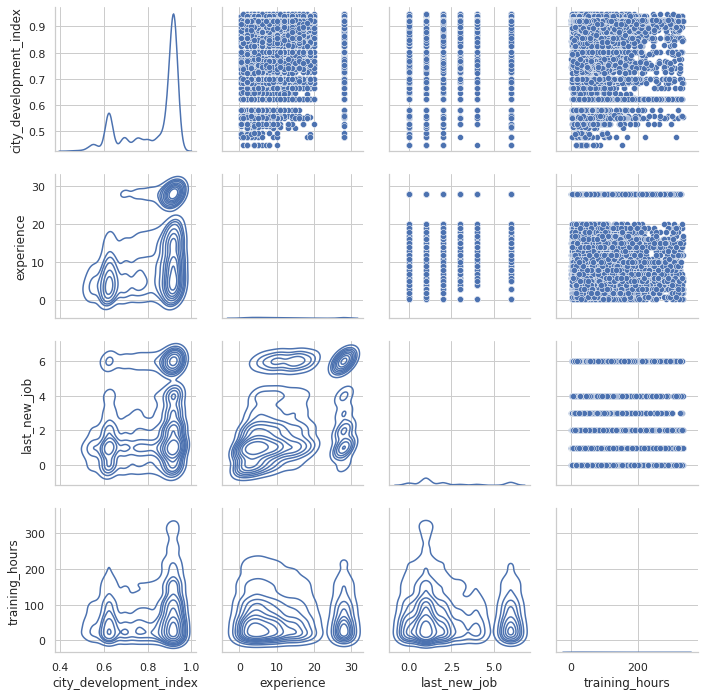

In [ ]:
g = sns.PairGrid(df_train)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

# Alternatives:
# scatter_matrix(Corr_Data)
# sns.pairplot(df_train)

Thanks to the visualizations, we can, in particular, notice the positive correlations between:

1. last_new_job/experience - high positve correlation - it might be due to the fact that people with lot of experience (probably aged people) are getting struggle while finding a job since companies prefers young and inexpensive employees
2. experience/city_development_index - positive correlation - it might be due to the fact that people who have a lot of experience are more comfortable financially and can afford to live in developed cities.

## 2.3 Inferential Statistics

Hypothesis: Is work experience correlated with the time taken to find the current job? 

We will implement a chi test which is more adapted to our hypothesis.

In [ ]:
contingency_table=pd.crosstab(df_train["experience_categorical"],df_train["last_new_job_categorical"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 last_new_job_categorical  Long  Medium  Never  Short
experience_categorical                              
Confirmed                 1379    1089    794   3073
Junior                     271     615   1314   2537
Senior                    3684    1193    336   2409
Observed Values :-
 [[1379 1089  794 3073]
 [ 271  615 1314 2537]
 [3684 1193  336 2409]]
Expected Values :-
 [[1807.57943725  981.73183909  828.21974965 2717.468974  ]
 [1351.6185942   734.09056382  619.30180807 2031.98903391]
 [2174.80196855 1181.17759709  996.47844228 3269.54199208]]
Degree of Freedom:- 1
chi-square statistic:- 2044.0336943187683
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 2044.0336943187683
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


Thans to this hypothesis test, we can confirm what we have seen earlier in the correlation section!

## 2.4 Data Preprocessing

### Handle outliers

In [ ]:
#WARNING : if we run this cell a second time the values of Q1, Q3, IQR will change and the size of df_train is reduced again.
quantitative_columns = ['city_development_index','training_hours','experience','last_new_job']
#drop outliers
for i in quantitative_columns:
    Q1 = df_train[i].quantile(0.25) 
    Q3 = df_train[i].quantile(0.75)
    IQR = Q3 - Q1
    index_1 = df_train[ df_train[i] < Q1 - 1.5 * IQR ].index #lower bound
    index_2 = df_train[ df_train[i] > Q3 + 1.5 * IQR ].index #upper bound
    df_train.drop(index_1 , inplace=True) #drop when the values are less than the lower bound
    df_train.drop(index_2 , inplace=True) #drop when the values are greater than the upper bound
    
print(df_train.shape)

(17711, 15)


In [ ]:
print(df_train.isnull().mean()*100)
df_train.isnull().sum()

city                         0.000000
city_development_index       0.000000
gender                      22.003275
relevent_experience          0.000000
enrolled_university          1.857603
education_level              2.185083
major_discipline            14.318785
experience                   0.000000
experience_categorical       0.000000
company_size                30.625035
company_type                31.505844
last_new_job                 0.000000
last_new_job_categorical     0.000000
training_hours               0.000000
target                       0.000000
dtype: float64


city                           0
city_development_index         0
gender                      3897
relevent_experience            0
enrolled_university          329
education_level              387
major_discipline            2536
experience                     0
experience_categorical         0
company_size                5424
company_type                5580
last_new_job                   0
last_new_job_categorical       0
training_hours                 0
target                         0
dtype: int64

### Handle missing values

We have a dataset of 17711 rows with missing values and 8493 without missing values. 

As we don't have any expertise in this domain it is better to remove missing values from our dataset.

In [ ]:
#drop missing values since we have enough data after droping them
try:
    df_train.dropna(subset=['enrolled_university', 'education_level', 'experience','experience_categorical','last_new_job', 'last_new_job_categorical','company_type','company_size', 'gender', 'major_discipline'], inplace=True)
except KeyError as e:
    print("We already droped these columns.")
print(df_train.isnull().sum())

city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                  0
experience_categorical      0
company_size                0
company_type                0
last_new_job                0
last_new_job_categorical    0
training_hours              0
target                      0
dtype: int64


### Backup df_train with df_train_backup

In [ ]:
df_train_backup = df_train.copy(deep=True)
print(df_train_backup.shape)

(8493, 15)


## 2.5 Feature Engineering and feature selection

#### Encoding


Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. 

We can observe that there are ordinal (rank order) and nominal (non-rank order) independent variables.

<center><img src="https://miro.medium.com/max/386/1*Yp6r7m82IoSnnZDPpDpYNw.png" width="500"></center>

In [ ]:
df_train = df_train_backup.copy()
df_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,experience_categorical,company_size,company_type,last_new_job,last_new_job_categorical,training_hours,target
1,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,Senior,50-99,Pvt Ltd,6,Long,47,0
4,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,28.0,Senior,50-99,Funded Startup,4,Long,8,0
7,46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,Senior,1-9,Pvt Ltd,6,Long,18,1
8,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,Confirmed,50-99,Pvt Ltd,1,Short,46,1
11,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,Confirmed,5000-9999,Pvt Ltd,1,Short,108,0


In [ ]:
try:
    df_train['company_size'] = df_train['company_size'].replace({'10-49': int(30), '1-9': int(5), '10000-20000': int(15000), '50-99': int(75), '5000-9999': int(7500), '1000-4999': int(3000), '500-999': int(750), '100-500': int(300) })
    df_train['gender'] = df_train['gender'].replace({'Female':int(0),'Male':int(1) ,'Other':int(-1)})
    df_train['relevent_experience'] = df_train['relevent_experience'].replace({'No relevent experience':int(0),'Has relevent experience':int(1)})
    df_train['enrolled_university'] = df_train['enrolled_university'].replace({'no_enrollment':int(0),'Full time course':int(1) ,'Part time course':int(-1)})
    df_train['education_level'] = df_train['education_level'].replace({'Graduate':int(0),'Masters':int(1) ,'High School':int(-1), 'Phd':int(2),'Primary School':int(3)})
    df_train['company_type'] = df_train['company_type'].replace({'Pvt Ltd':int(0), 'Funded Startup':int(-1), 'Early Stage Startup':int(2), 'Other':int(3),'Public Sector':int(4), 'NGO':int(5)})
    df_train['major_discipline'] = df_train['major_discipline'].replace({'STEM':int(-1) ,'Business Degree':int(0), 'Arts':int(1) ,'Humanities':int(2) ,'No Major':int(3) ,'Other':int(4)})
except TypeError:
    print("Already preprocessed: convert categorical variables to numerical")

try:
    df_train.drop(['last_new_job_categorical', 'experience_categorical'], axis='columns', inplace=True)
except KeyError:
    print("Already preprocessed: column last_new_job_categorical or experience_categorical droped")

df_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,40,0.776,1,0,0,0,-1,15.0,75,0,6,47,0
4,162,0.767,1,1,0,1,-1,28.0,75,-1,4,8,0
7,46,0.762,1,1,0,0,-1,13.0,5,0,6,18,1
8,103,0.920,1,1,0,0,-1,7.0,75,0,1,46,1
11,103,0.920,1,1,0,0,-1,5.0,7500,0,1,108,0


During the encoding process, we transform all categorical variables to integers except city (handled by SMOTE in the next step).

In [ ]:
df_train.dtypes

city                      category
city_development_index     float64
gender                       int64
relevent_experience          int64
enrolled_university          int64
education_level              int64
major_discipline             int64
experience                 float64
company_size                 int64
company_type                 int64
last_new_job                 int64
training_hours               int64
target                    category
dtype: object

The following vizualisation is only to mesure the impact of our preprocessing on the correlation.

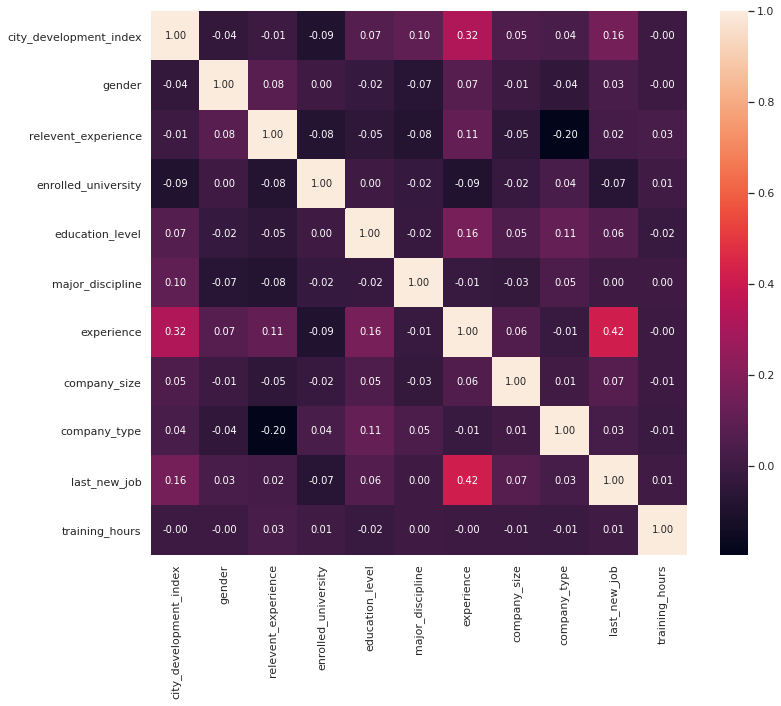

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f')

#### Data Augmentation for Imbalanced Data

**Prepare X_train and y_train -- move up**

In [ ]:
X_train = df_train.drop(columns='target')
y_train = df_train['target']

**Balance dataset**

X_train original shape:
(8493, 12)

y_train original shape:
(8493,)

Counter for y_train: Counter({0: 7088, 1: 7088})

X_train rebalanced shape:
(14176, 12)

y_train rebalanced shape:
(14176, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


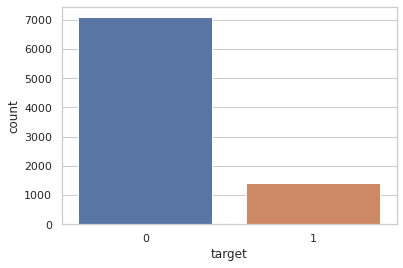

In [ ]:
#we are dealing with imbalanced data
fig_dims = (6, 4)
fig, axs = plt.subplots(figsize=fig_dims)
sns.countplot(x='target', data=df_train)

print('X_train original shape:')
print(X_train.shape)
print('\ny_train original shape:')
print(y_train.shape)

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=0)
X_resampled, y_train = smote.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_resampled, columns=X_train.columns)

# summarize the new class distribution
counter = Counter(y_train)
print('\nCounter for y_train: ' + str(counter))

print('\nX_train rebalanced shape:')
print(X_train.shape)
y_train = y_train.reshape(-1, 1)
print('\ny_train rebalanced shape:')
print(y_train.shape)

In [ ]:
X_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,40.0,0.776,1.0,0.0,0.0,0.0,-1.0,15.0,75.0,0.0,6.0,47.0
1,162.0,0.767,1.0,1.0,0.0,1.0,-1.0,28.0,75.0,-1.0,4.0,8.0
2,46.0,0.762,1.0,1.0,0.0,0.0,-1.0,13.0,5.0,0.0,6.0,18.0
3,103.0,0.920,1.0,1.0,0.0,0.0,-1.0,7.0,75.0,0.0,1.0,46.0
4,103.0,0.920,1.0,1.0,0.0,0.0,-1.0,5.0,7500.0,0.0,1.0,108.0


SMOTE convert all types to *float64*

In [ ]:
X_train.dtypes

city                      float64
city_development_index    float64
gender                    float64
relevent_experience       float64
enrolled_university       float64
education_level           float64
major_discipline          float64
experience                float64
company_size              float64
company_type              float64
last_new_job              float64
training_hours            float64
dtype: object

The following vizualisation is only to mesure the impact of our preprocessing on the correlation (e.g. *city* is not correlated to *city_development_index*).

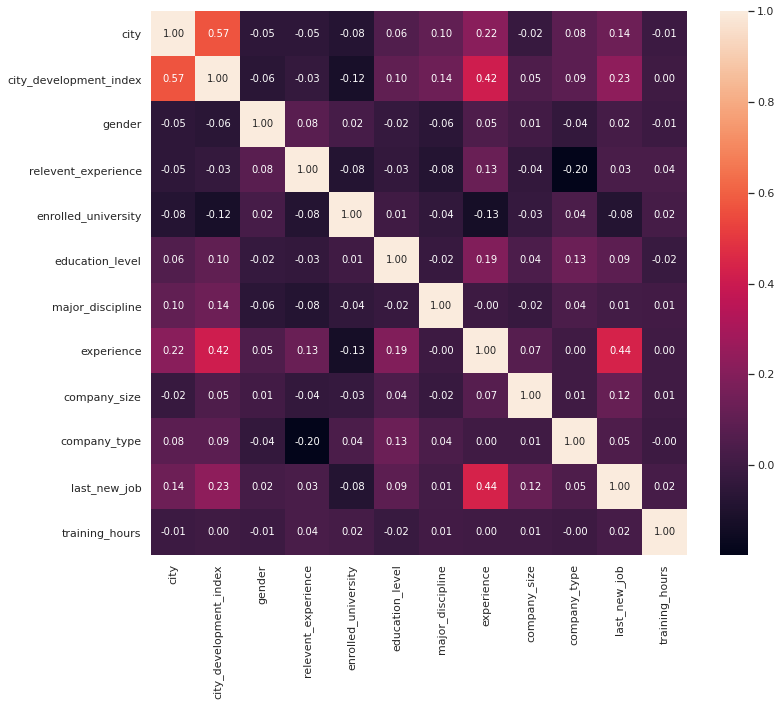

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True,fmt='.2f')

#### Train and Test sets

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print('Training:')
print(X_train.shape)
print(y_train.shape)
print('\nValidation: ')
print(X_val.shape)
print(y_val.shape)

Training:
(11340, 12)
(11340, 1)

Validation: 
(2836, 12)
(2836, 1)


#### RandomForestClassifier

**Notes:**

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. 

Sequentially apply a list of transforms and a final estimator. 

In [ ]:
if False:
    param_grid = {
      'n_estimators': [100, 250, 500],
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [10, 15],
      'min_samples_split': [100]
    }

    # use out-of-bag samples ("oob_score= True") to estimate the generalization accuracy.
    rfc = RandomForestClassifier(bootstrap= True, n_jobs=-1, oob_score= True)

    # cv=10 in the GridSearchCV and initialize the grid
    grid_rfc = GridSearchCV(rfc, param_grid = param_grid, cv=10, scoring ='accuracy')

    # fit your data before you can get the best parameter combination.
    grid_rfc.fit(X_train,y_train.ravel())
    grid_rfc.cv_results_

    print("GridSearhCV best model:\n ")
    print('The best score: ', grid_rfc.best_score_)
    print('The best parameter:', grid_rfc.best_params_)
    print('The best model estimator:', grid_rfc.best_estimator_)

In [ ]:
rf_pipe = Pipeline(steps =[
                           ('std_scale',StandardScaler()),
                           ("RF",RandomForestClassifier(random_state=0, max_depth=15, max_features=5, n_estimators= 500))])
rf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('std_scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RF',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=15, max_features=5,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)

#### Feature Importance

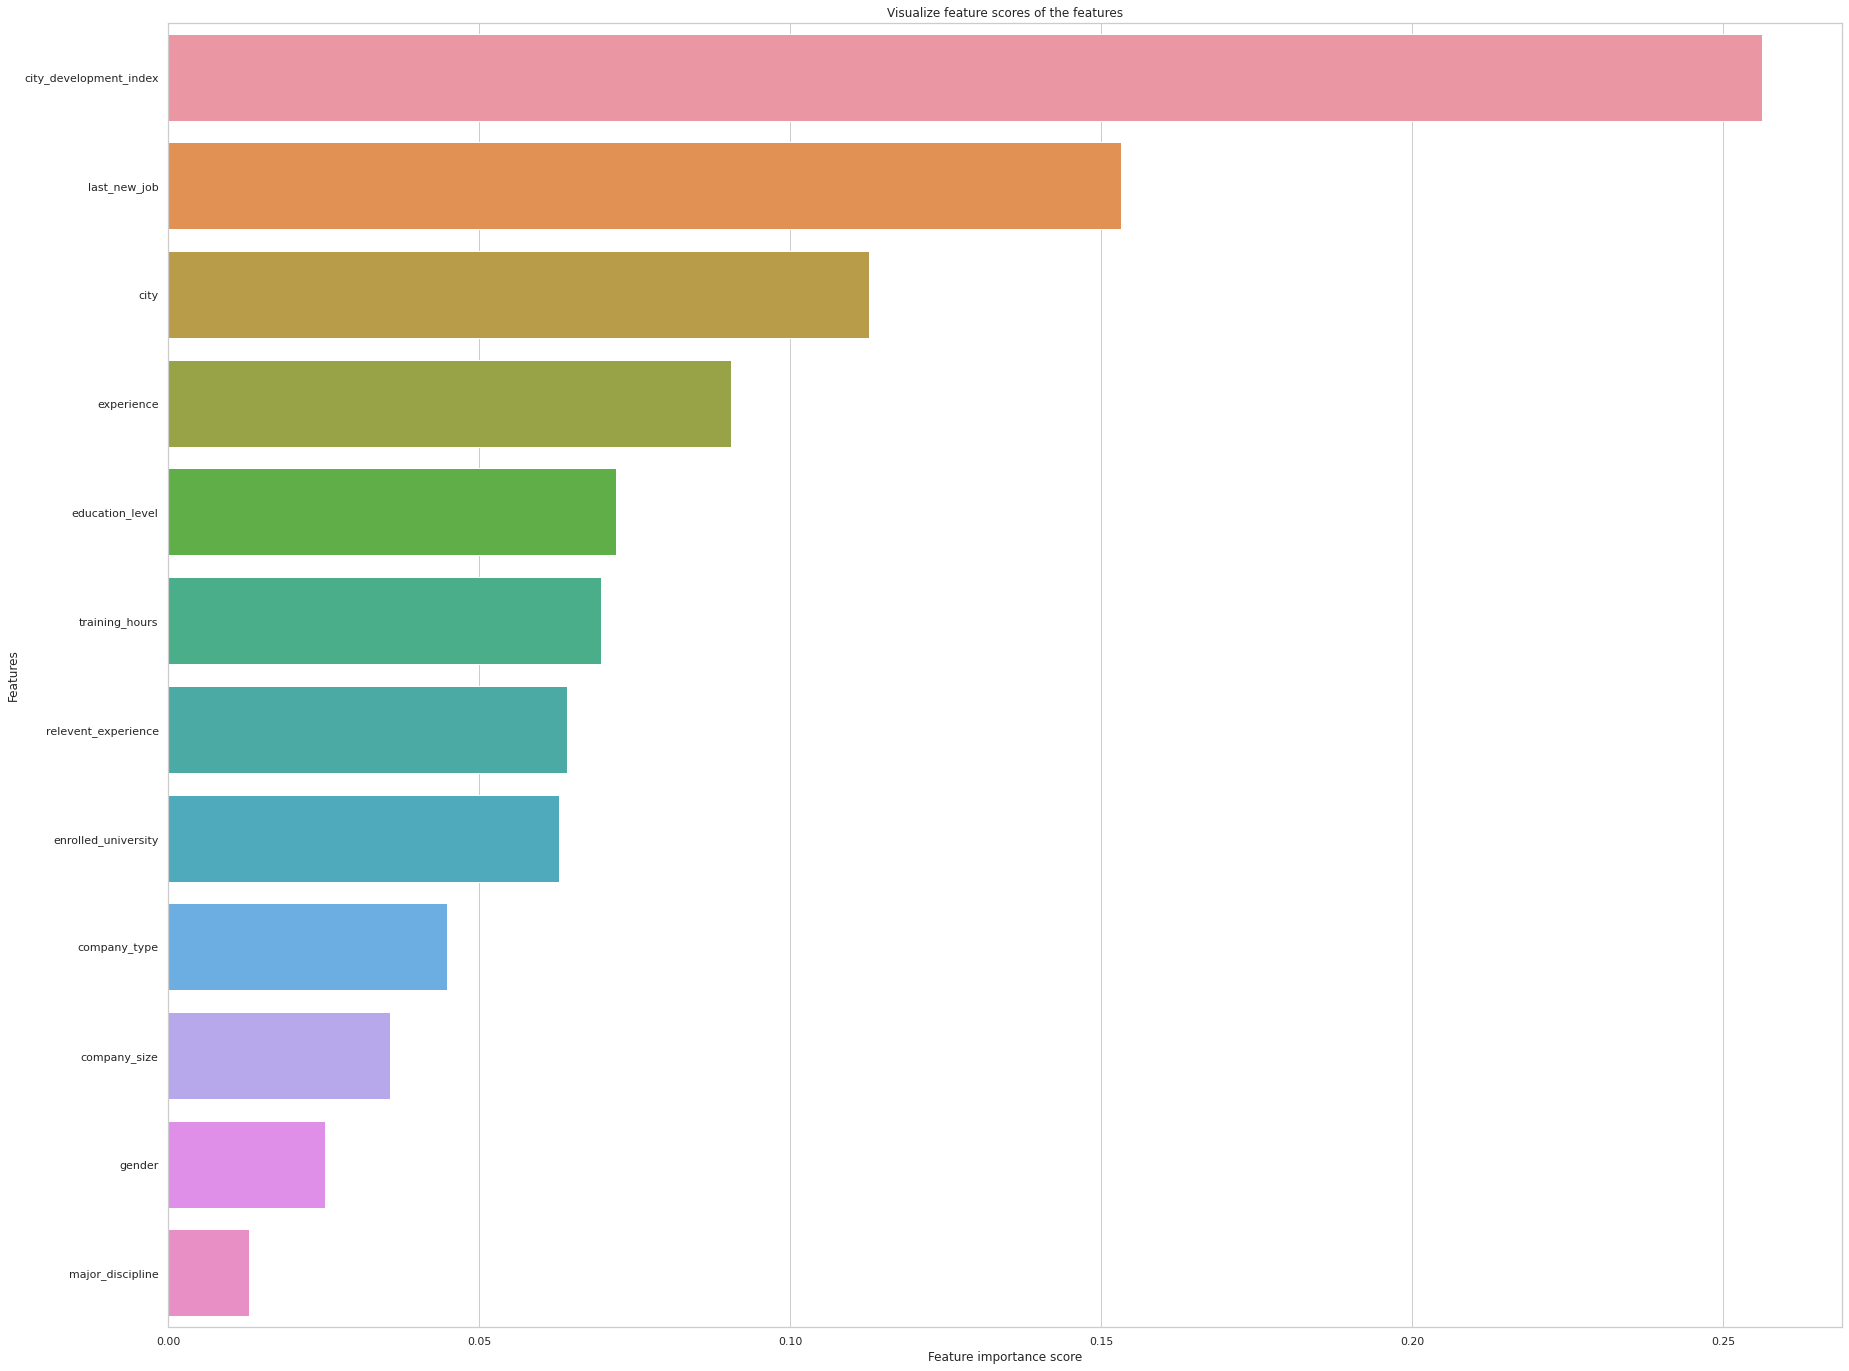

In [ ]:
feature_importances = pd.Series(rf_pipe.steps[1][1].feature_importances_, index=X_train.columns).sort_values(ascending=False);
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_importances, y=feature_importances.index, data=df_train.T)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_importances.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## 2.6 Data Science Algorithms

### CLASSIFICATION: Decision Tree and Random Forest 

#### [Trees] Algorithms

**Notes:**

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. 

Sequentially apply a list of transforms and a final estimator. 

**RandomForestClassifier**

In [ ]:
param_grid = {
  'n_estimators': [100, 250, 500],
  'max_depth': [5, 10, 15],
  'min_samples_leaf': [10, 15],
  'min_samples_split': [100]
}

# use out-of-bag samples ("oob_score= True") to estimate the generalization accuracy.
rfc = RandomForestClassifier(bootstrap= True, n_jobs=-1, oob_score= True)

# cv=10 in the GridSearchCV and initialize the grid
grid_rfc = GridSearchCV(rfc, param_grid = param_grid, cv=10, scoring ='accuracy')

# fit your data before you can get the best parameter combination.
grid_rfc.fit(X_train,y_train.ravel())
grid_rfc.cv_results_

print("GridSearhCV best model:\n ")
print('The best score: ', grid_rfc.best_score_)
print('The best parameter:', grid_rfc.best_params_)
print('The best model estimator:', grid_rfc.best_estimator_)

GridSearhCV best model:
 
The best score:  0.8831569664902998
The best parameter: {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 500}
The best model estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)


In [ ]:
rf_pipe = Pipeline(steps =[
                           ('std_scale',StandardScaler()),
                           ("RF",RandomForestClassifier(random_state=0, max_depth=15, max_features=5, n_estimators= 500))])
rf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('std_scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RF',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=15, max_features=5,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)

**Export and test loading the model**

In [ ]:
from joblib import dump, load
dump(dt_pipe, 'dt_pipe.joblib') 

['dt_pipe.joblib']

In [ ]:
print(list(X_train.loc[[0]].values))

lst = [[40.   ,  0.776,  1.   ,  0.   ,  0.   ,  0.   , -1.   , 15., 75.   ,  0.   ,  6.   , 47.   ]] 
    
X_to_test = pd.DataFrame(lst, columns =['city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours'], dtype = float) 
X_to_test

[array([40.   ,  0.776,  1.   ,  0.   ,  0.   ,  0.   , -1.   , 15.   ,
       75.   ,  0.   ,  6.   , 47.   ])]


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,40.0,0.776,1.0,0.0,0.0,0.0,-1.0,15.0,75.0,0.0,6.0,47.0


In [ ]:
rf_pipe_test = load('rf_pipe.joblib') 
rf_train_predict_test = rf_pipe_test.predict(X_to_test)
print(rf_train_predict_test)

[0]


**DecisionTreeClassifier**

In [ ]:
dt_pipe = Pipeline(steps =[ ('_std_scale',StandardScaler()), ("DT",DecisionTreeClassifier(criterion='gini',max_features=10, max_depth=10, min_samples_leaf=15, min_samples_split=100,random_state=0)) ])
dt_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('_std_scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('DT',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=10,
                                        max_features=10, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=15,
                                        min_samples_split=100,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=0,
                                        splitter='best'))],
         verbose=False)

#### [Trees] Feature Importance

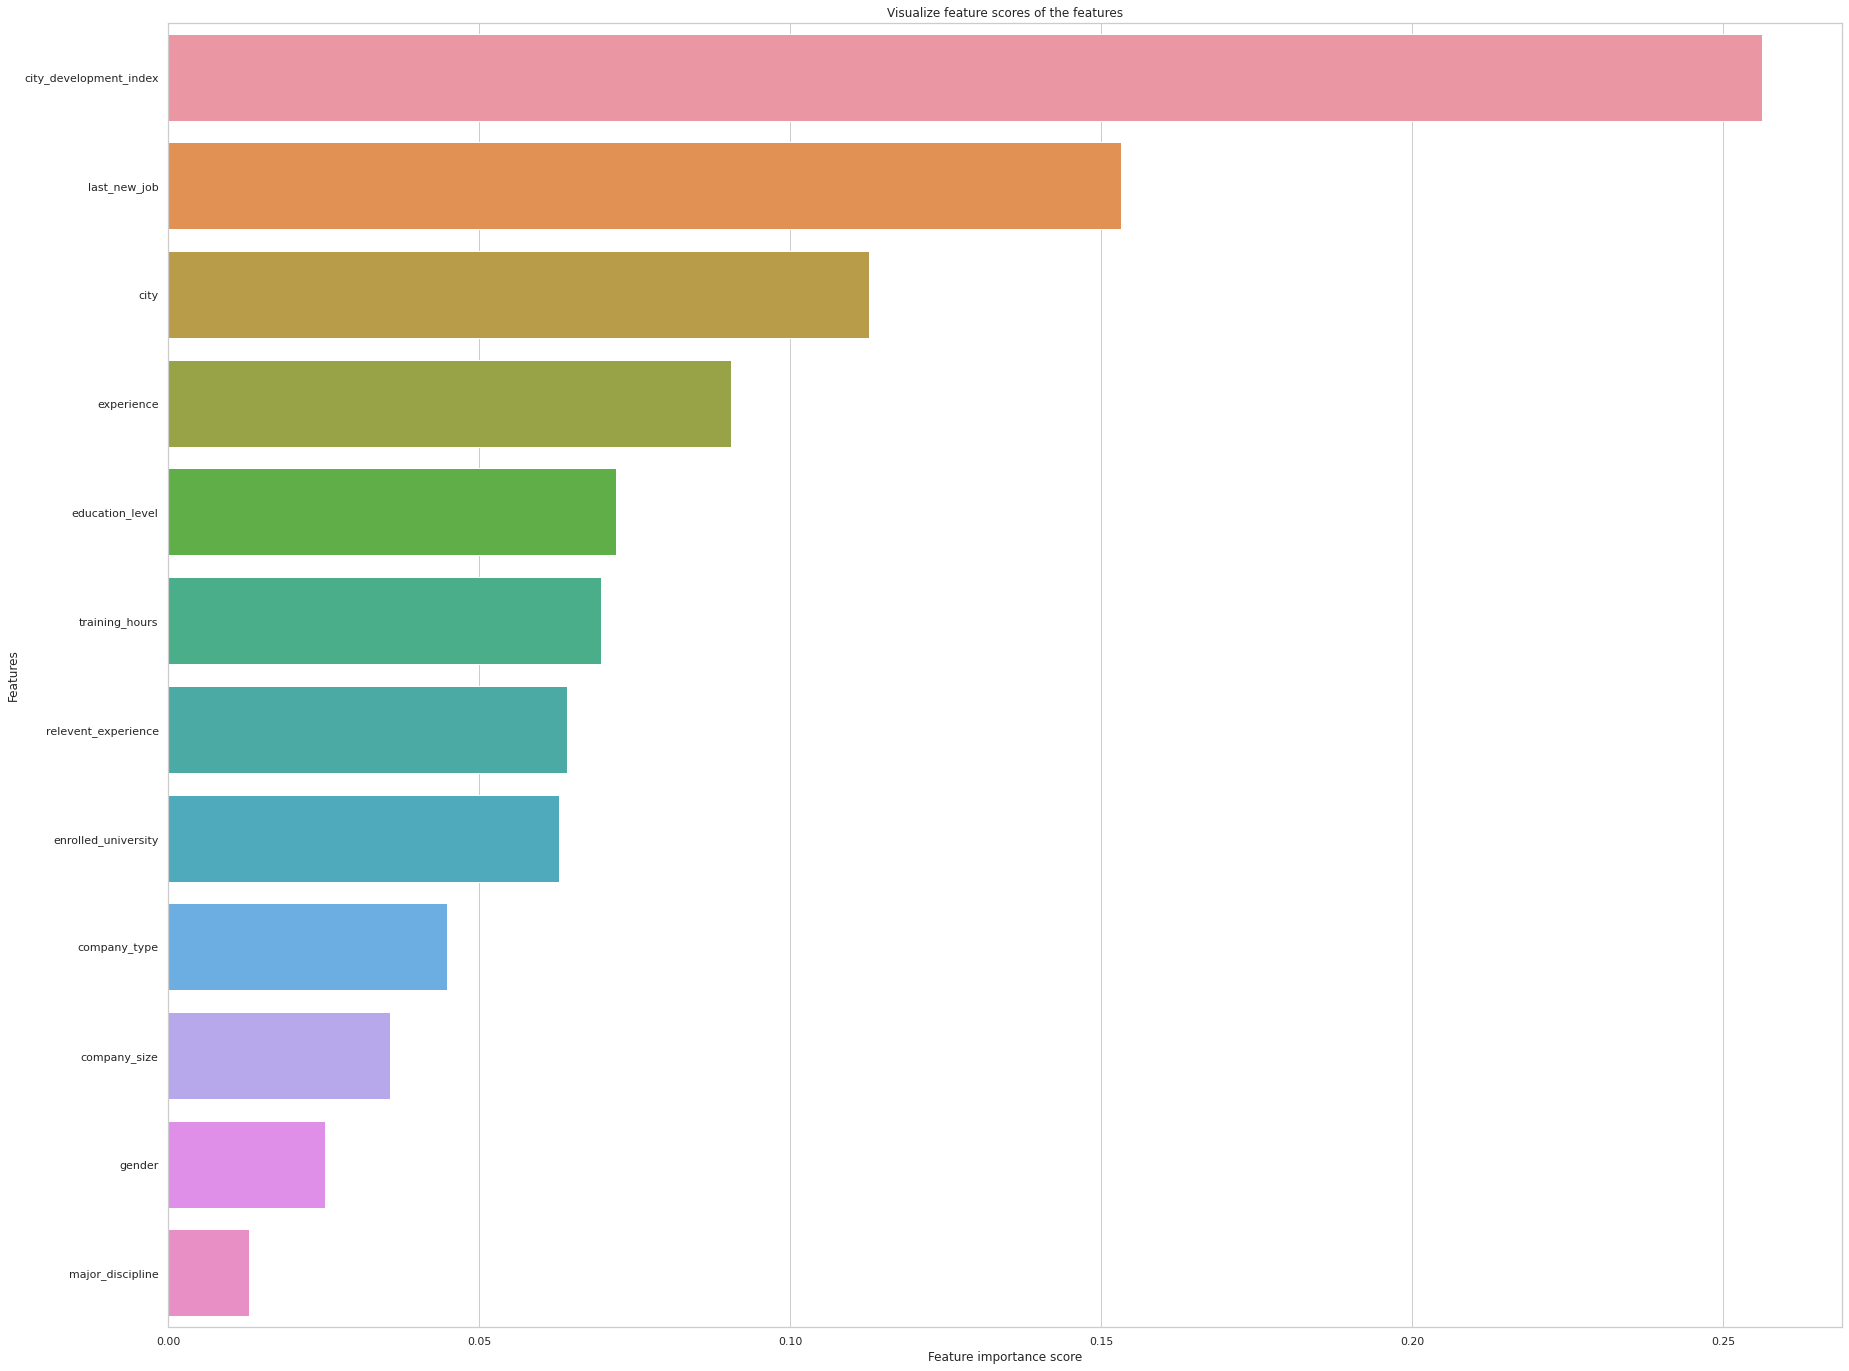

In [ ]:
feature_importances = pd.Series(rf_pipe.steps[1][1].feature_importances_, index=X_train.columns).sort_values(ascending=False);
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_importances, y=feature_importances.index, data=df_train.T)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_importances.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

Feature importance shows us which are the independent variable are given importance and that chosen for a split of the decision trees or regression.

#### [Trees] Model Evaluation

Predict the class: 
- 0 – Not looking for job change
- 1 – Looking for a job change

In [ ]:
rf_train_predict = rf_pipe.predict(X_train)
dt_train_predict = dt_pipe.predict(X_train)

In [ ]:
print('Random Forest classification_report on train_set:\n')
print(classification_report(y_train, rf_train_predict))

Random Forest classification_report on train_set:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5690
           1       0.97      0.94      0.96      5650

    accuracy                           0.96     11340
   macro avg       0.96      0.96      0.96     11340
weighted avg       0.96      0.96      0.96     11340



In [ ]:
print('Decision Tree classification_report on train_set:\n')
print(classification_report(y_train, dt_train_predict))

Decision Tree classification_report on train_set:

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      5690
           1       0.89      0.84      0.87      5650

    accuracy                           0.87     11340
   macro avg       0.87      0.87      0.87     11340
weighted avg       0.87      0.87      0.87     11340



**Probabilities for the target**

In [ ]:
rf_probs_test = rf_pipe.predict_proba(X_val)
rf_probs_test = rf_probs_test[:, 1]

dt_probs_test = dt_pipe.predict_proba(X_val)
dt_probs_test = dt_probs_test[:, 1]

**Note: .predict vs .predict_proba**

.predict just takes the .predict_proba output and changes everything to 0 below a certain threshold (usually 0.5) respectively to 1 above that threshold.

#### [Trees] Area under the curve (AUC)

In [ ]:
auc_RF = roc_auc_score(y_val, rf_probs_test)
auc_dt = roc_auc_score(y_val, dt_probs_test)
print('Random forest auc on test data',auc_RF)
print('Decision tree auc on test data',auc_dt)

Random forest auc on test data 0.9557884699182819
Decision tree auc on test data 0.9240134923524764


In [ ]:
def create_roc_curve(title: str, y_val, probs_test):
    #Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.
    logit_roc_auc = roc_auc_score(y_val, probs_test)
    fpr, tpr, thresholds = roc_curve(y_val, probs_test)
    plt.figure()
    plt.plot(fpr, tpr, label = title + ' (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

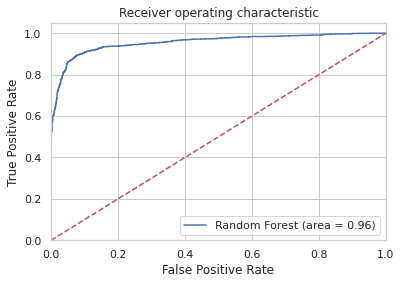

In [ ]:
create_roc_curve(title='Random Forest', y_val=y_val, probs_test=rf_probs_test)

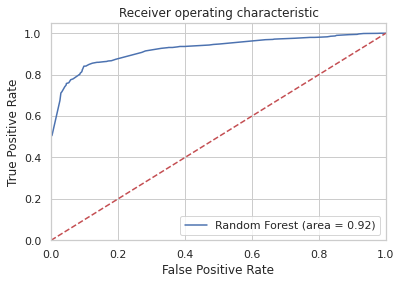

In [ ]:
create_roc_curve(title='Random Forest', y_val=y_val, probs_test=dt_probs_test)

### CLASSIFICATION: k-NN

**Objective:**

We want to use k-Nearest-Neighbors to predict the classification of a new sample point, *i.e.* to know if a person is looking for a new opportunity or not.

**What is k-Nearest-Neighbors?**

KNN is a non-parametric, lazy learning classification algorithm. 
It is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The case being assigned to the class is most common amongst its K nearest neighbors measured by a distance function.

KNN has three basic steps.
1. Calculate the distance.
2. Find the k nearest neighbours.
3. Vote for classes

<center><img src="https://miro.medium.com/max/1000/0*sYMSaIon56Qng2hF.png" width="500"></center>

**Comments:**

We believe k-Nearest-Neighbors is a great choice of algorithm for our dataset as we have a binary problem with a large set of labeled data.

Indeed, our data points are separated into several classes and we cannot make any assumptions about our data.

Furthermore, even if k-NN requires a lot of memory and RAM, our dataset is not too large (10000 values after preprocessing). Therefore, prediction stage will be fast enough.

#### [k-NN] Classification with k-Neirest Neighbours

KNeighborsClassifier with k=5
[1 0 1 ... 0 1 1]

Confusion Matrix to evaluate the performance of the classification model:
[[ 956  442]
 [ 189 1249]]


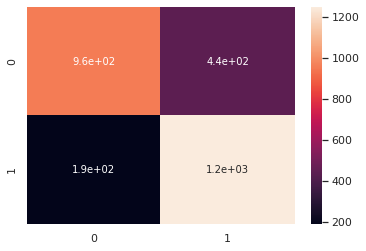

In [ ]:
# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels. Fitting the k-NN classiifer
# np.ravel() converts labels from a column format to the expected row format and flattens the numpy.nparray.

INITIAL_NUMBER_NEIGHBORS = 5
print("KNeighborsClassifier with k=" + str(INITIAL_NUMBER_NEIGHBORS))
classifier = KNeighborsClassifier(n_neighbors=INITIAL_NUMBER_NEIGHBORS)
classifier.fit(X_train, np.ravel(y_train,order='C'))
y_pred = classifier.predict(X_val)
print(y_pred)

print('\nConfusion Matrix to evaluate the performance of the classification model:')
print(confusion_matrix(y_val, y_pred))
fig_dims = (6, 4)
fig, axs = plt.subplots(figsize=fig_dims)
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True)

In [ ]:
print('\nClassification Report:')
print(classification_report(y_val, y_pred))

accuracy =  accuracy_score(y_val,y_pred)*100
print('\nAccuracy of k-Nearest Neighbors on test set: {:.3f}'.format(accuracy))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75      1398
           1       0.74      0.87      0.80      1438

    accuracy                           0.78      2836
   macro avg       0.79      0.78      0.78      2836
weighted avg       0.79      0.78      0.78      2836


Accuracy of k-Nearest Neighbors on test set: 77.750


#### [k-NN] Choosing the best features

In [ ]:
X_train = X_train[['city_development_index', 'experience', 'last_new_job']]
X_val = X_val[['city_development_index', 'experience', 'last_new_job']]
X_train.head()

,city_development_index,experience,last_new_job
0,0.899000,16.000000,3.00000
1,0.897000,4.000000,2.00000
2,0.920000,13.000000,1.00000
3,0.571573,6.708467,3.87460
4,0.624000,6.000000,2.96117


KNeighborsClassifier with k=10
[1 0 1 ... 0 1 1]

Confusion Matrix to evaluate the performance of the classification model:
[[1322   76]
 [ 360 1078]]


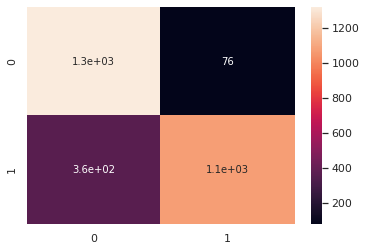

In [ ]:
# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels. Fitting the k-NN classiifer
# np.ravel() converts labels from a column format to the expected row format and flattens the numpy.nparray.

INITIAL_NUMBER_NEIGHBORS = 10
print("KNeighborsClassifier with k=" + str(INITIAL_NUMBER_NEIGHBORS))
classifier = KNeighborsClassifier(n_neighbors=INITIAL_NUMBER_NEIGHBORS)
classifier.fit(X_train, np.ravel(y_train,order='C'))
y_pred = classifier.predict(X_val)
print(y_pred)

print('\nConfusion Matrix to evaluate the performance of the classification model:')
print(confusion_matrix(y_val, y_pred))
fig_dims = (6, 4)
fig, axs = plt.subplots(figsize=fig_dims)
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True)

In [ ]:
print('\nClassification Report:')
print(classification_report(y_val, y_pred))

accuracy =  accuracy_score(y_val,y_pred)*100
print('\nAccuracy of k-Nearest Neighbors on test set: {:.3f}'.format(accuracy))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1398
           1       0.93      0.75      0.83      1438

    accuracy                           0.85      2836
   macro avg       0.86      0.85      0.85      2836
weighted avg       0.86      0.85      0.84      2836


Accuracy of k-Nearest Neighbors on test set: 84.626


#### [k-NN] Hyperparameters optimization: k

Scores:
[0.8444992947813822, 0.8540197461212976, 0.8519040902679831, 0.8533145275035261, 0.8624823695345557, 0.8554301833568406, 0.8575458392101551, 0.8529619181946403, 0.8543723554301833, 0.846262341325811, 0.8455571227080395, 0.842031029619182, 0.8444992947813822, 0.8346262341325811, 0.8370944992947814, 0.8328631875881524, 0.8328631875881524, 0.826163610719323, 0.8268688293370945, 0.8212270803949224, 0.8219322990126939, 0.8180535966149506, 0.8162905500705219, 0.811706629055007, 0.810296191819464, 0.8050070521861777, 0.8028913963328632, 0.7976022566995769, 0.8004231311706629, 0.7983074753173484, 0.8007757404795487, 0.7947813822284908, 0.7961918194640338, 0.7919605077574048, 0.7926657263751763, 0.7891396332863188, 0.7905500705218618, 0.7824400564174894, 0.7856135401974612]
Errors:
[0.500164119988621, 0.5014621598986235, 0.5008454666080476, 0.5014522132326465, 0.5010046132636802, 0.501283119911037, 0.5010245065956342, 0.5013577199058648, 0.5010891599244849, 0.5013129599089681, 0.5010344

Text(0, 0.5, 'Mean Error')

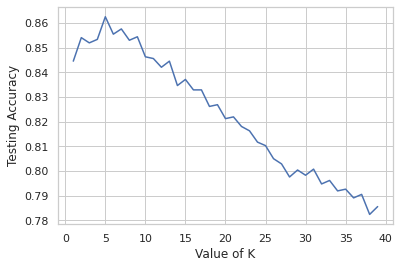

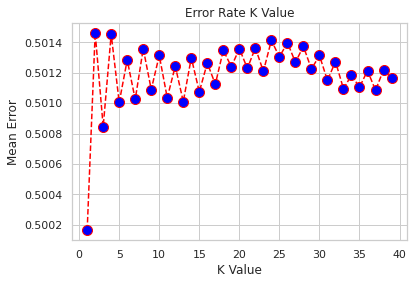

In [ ]:
k_range = range(1, 40)

# Creating a Python dictionary by [] and then appending the accuracy scores
scores = []
errors = []

#  looping through the range 1 to 40
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = knn.predict(X_val)
    # scores
    scores.append(accuracy_score(y_val, y_pred))
    # errors
    errors.append(np.mean(y_pred != y_val))

print('Scores:')
print(scores)

print('Errors:')
print(errors)

# Printing the K number of negihvors and Testing Accuracy.
fig_dims = (6, 4)
fig, axs = plt.subplots(figsize=fig_dims)
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')

plt.figure(figsize=(6, 4))
plt.plot(range(1, 40), errors, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### [k-NN] Hyperparameters optimization: Cross validation

Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set.

<center><img src="https://miro.medium.com/max/1400/1*NyvaFiG_jXcGgOaouumYJQ.jpeg" width="500"></center>

In [ ]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=1)

# Train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train.ravel(), cv=5)

# Print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.82671958 0.82539683 0.82892416 0.82363316 0.82936508]
cv_scores mean:0.8268077601410934


Using **cross-validation**, our mean score is about **84.57%**. This is a **more accurate representation of how our model will perform on unseen data** than our earlier testing using the holdout method.

#### [k-NN] Hyperparameters optimization: GridSearchCV

GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

We can see that 1 is the optimal value for *n_neighbors*. We can use the *best_score_* function to check the accuracy of our model when *n_neighbors* is 1. *best_score_* outputs the mean accuracy of the scores obtained through cross-validation.

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8268077601410934

#### [k-NN] Compare k-NN with Random Forest

##### [k-NN] Find the best hyperparameters

**RandomForestClassifier**

In [ ]:
if True:
    param_grid = {
      'n_estimators': [100, 250, 500],
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [10, 15],
      'min_samples_split': [100]
    }

    # use out-of-bag samples ("oob_score= True") to estimate the generalization accuracy.
    rfc = RandomForestClassifier(bootstrap= True, n_jobs=-1, oob_score= True)

    # cv=10 in the GridSearchCV and initialize the grid
    grid_rfc = GridSearchCV(rfc, param_grid = param_grid, cv=10, scoring ='accuracy')

    # fit your data before you can get the best parameter combination.
    grid_rfc.fit(X_train,y_train.ravel())
    grid_rfc.cv_results_

    print("GridSearhCV best model:\n ")
    print('The best score: ', grid_rfc.best_score_)
    print('The best parameter:', grid_rfc.best_params_)
    print('The best model estimator:', grid_rfc.best_estimator_)

GridSearhCV best model:
 
The best score:  0.8833333333333334
The best parameter: {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 500}
The best model estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)


In [ ]:
rf_pipe = Pipeline(steps =[
                           ('std_scale',StandardScaler()),
                           ("RF",RandomForestClassifier(random_state=0, max_depth=15, n_estimators= 500))])
rf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('std_scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RF',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=15, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)

**DecisionTreeClassifier**

In [ ]:
dt_pipe = Pipeline(steps =[ ('_std_scale',StandardScaler()), ("DT",DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=15, min_samples_split=100,random_state=0)) ])
dt_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('_std_scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('DT',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=10,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=15,
                                        min_samples_split=100,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=0,
                                        splitter='best'))],
         verbose=False)

##### [k-NN] Random Forest: Model Evaluation

Predict the class: 
- 0 – Not looking for job change
- 1 – Looking for a job change

In [ ]:
rf_train_predict = rf_pipe.predict(X_train)
dt_train_predict = dt_pipe.predict(X_train)

In [ ]:
print('Random Forest classification_report on train_set:\n')
print(classification_report(y_train, rf_train_predict))

Random Forest classification_report on train_set:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5690
           1       0.94      0.89      0.92      5650

    accuracy                           0.92     11340
   macro avg       0.92      0.92      0.92     11340
weighted avg       0.92      0.92      0.92     11340



In [ ]:
print('Decision Tree classification_report on train_set:\n')
print(classification_report(y_train, dt_train_predict))

Decision Tree classification_report on train_set:

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      5690
           1       0.90      0.83      0.86      5650

    accuracy                           0.87     11340
   macro avg       0.87      0.87      0.87     11340
weighted avg       0.87      0.87      0.87     11340



**Probabilities for the target**

In [ ]:
rf_probs_test = rf_pipe.predict_proba(X_val)
rf_probs_test = rf_probs_test[:, 1]

dt_probs_test = dt_pipe.predict_proba(X_val)
dt_probs_test = dt_probs_test[:, 1]

**Note: .predict vs .predict_proba**

.predict just takes the .predict_proba output and changes everything to 0 below a certain threshold (usually 0.5) respectively to 1 above that threshold.

##### [k-NN] Random Forest: Area under the curve (AUC)

In [ ]:
auc_RF = roc_auc_score(y_val, rf_probs_test)
auc_dt = roc_auc_score(y_val, dt_probs_test)
print('Random forest auc on test data',auc_RF)
print('Decision tree auc on test data',auc_dt)

Random forest auc on test data 0.9301343962465751
Decision tree auc on test data 0.9115742039591629


In [ ]:
def create_roc_curve(title: str, y_val, probs_test):
    #Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.
    logit_roc_auc = roc_auc_score(y_val, probs_test)
    fpr, tpr, thresholds = roc_curve(y_val, probs_test)
    plt.figure()
    plt.plot(fpr, tpr, label = title + ' (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

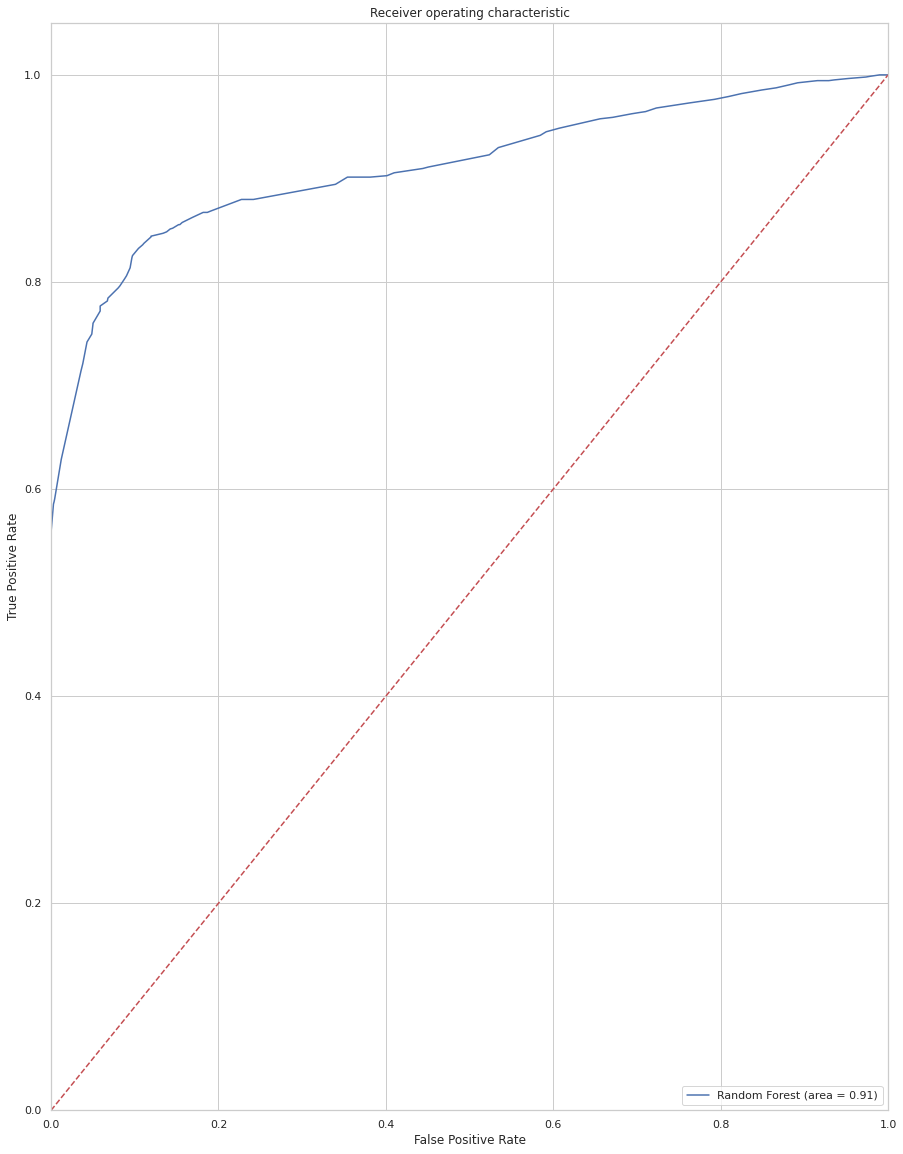

In [ ]:
create_roc_curve(title='Random Forest', y_val=y_val, probs_test=dt_probs_test)

It seems that Random Forest algorithm has a best accuracy compare to k-Nearest-Neighbors classifier. 

Nevertheless, is our Random Forest implementation overfitting our data?

#### [k-NN] Using PCA and not slected features

In [ ]:
df_train = X_train + y_train

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_train)
principalDf = pd.DataFrame(principalComponents, columns = ['PC1','PC2'])

### CLASSIFICATION: Naive Bayes'

Naive Bayes algorithms are a set of supervised machine learning algorithms based on the Bayes probability theorem. Naive Bayes algorithms assume that there’s no correlation between features in a dataset used to train the model.

**Naive**

The word naive implies that every pair of features in the dataset is independent of each other. All naive Bayes classifiers work on the assumption that the value of a particular feature is independent from the value of any other feature for a given the class.

**Bayes probability theorem**

The Bayes theorem describes the probability of a feature, based on prior knowledge of situations related to that feature.

1. First, let's scale X_train and X_val with StandardScaler method

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

2. We deal with continuous features. So we can use the  GaussianNB function. It’s assumed that the continuous values associated with each class are distributed according to a normal distribution.

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy =  accuracy_score(y_val,y_pred)*100
print(y_pred)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(accuracy)

[1 0 1 ... 0 1 0]
[[1133  265]
 [ 521  917]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      1398
           1       0.78      0.64      0.70      1438

    accuracy                           0.72      2836
   macro avg       0.73      0.72      0.72      2836
weighted avg       0.73      0.72      0.72      2836

72.28490832157969


locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f5b55e545c0>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f5b55e545c0>
Setting pcolormesh
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.399999999999999.
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
fin

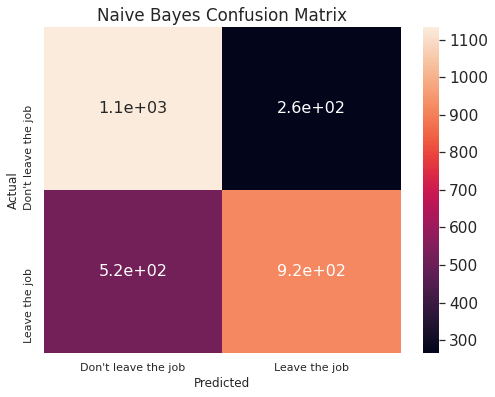

In [ ]:
# confusion matrix
cm = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},xticklabels=["Don't leave the job", "Leave the job"], yticklabels=["Don't leave the job", "Leave the job"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

Our algorithm performances aren't good enough. We are going to choose some features thanks to feature importance and ExtraTreesClassifier.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0.09326368 0.22327163 0.03187025 0.05501175 0.05751568 0.06820149
 0.02662819 0.11498112 0.06399989 0.05682468 0.10513149 0.10330016]


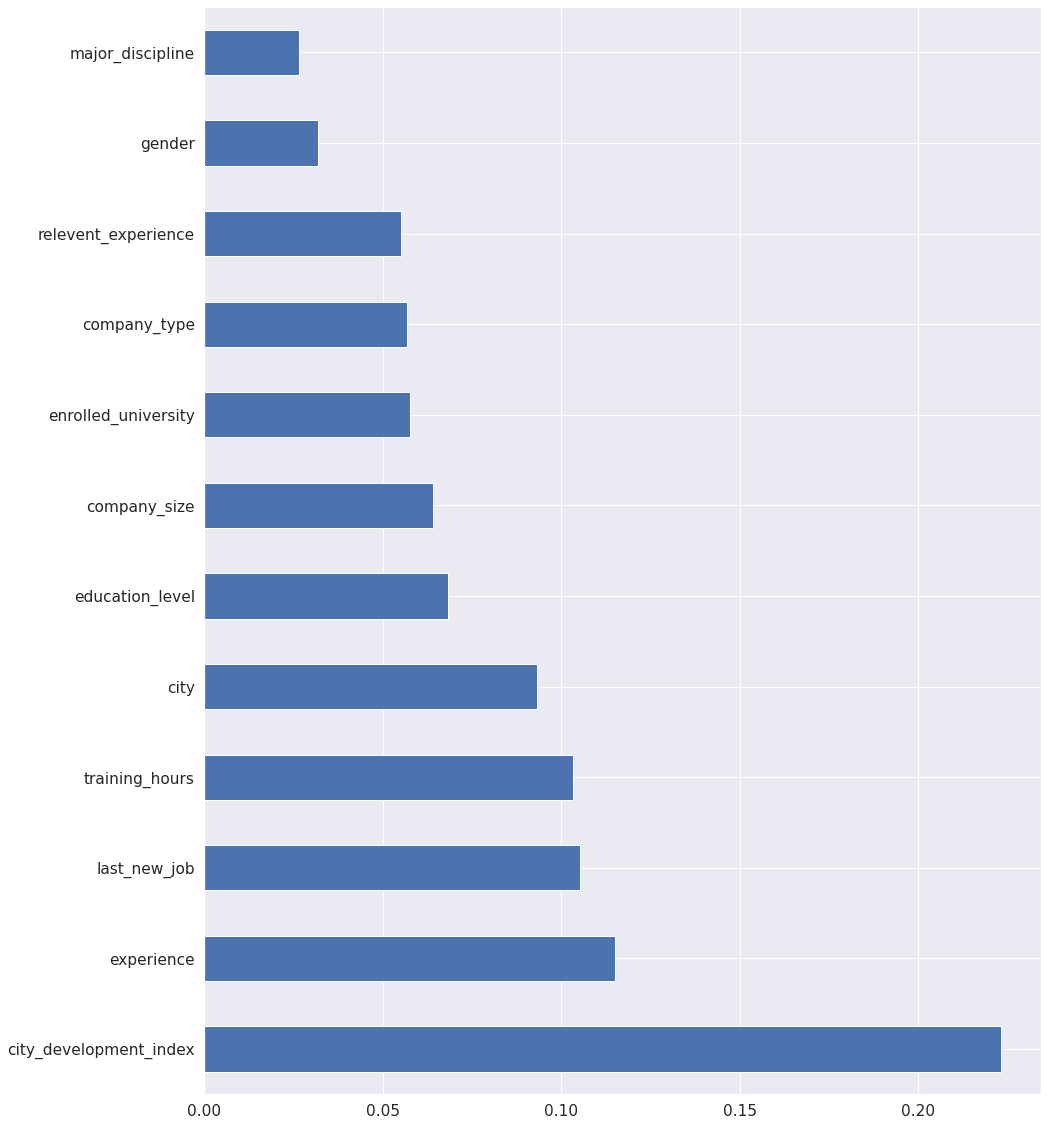

In [ ]:
#Let's tale X_train and y_train as they were after preprocessing
X_train = df_train.drop(columns='target')
y_train = df_train['target']

#Balance the data
smote = SMOTE(random_state=0)
X_resampled, y_train = smote.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_resampled, columns=X_train.columns)

# feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

print(model.feature_importances_) #we use feature_importances here

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

We can see from the graph that the four most important features are city_development_index, experience, last_new_job, trainng_hours.

In [ ]:
#Let's define X_train with these four features only
X_train = X_train[['city_development_index','training_hours','experience','last_new_job']] 

# Dividing data into two subsets training and validation set.
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)

# Data normalization  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_val)
accuracy =  accuracy_score(y_val,y_pred)*100

print(y_pred)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(accuracy)

[0 1 0 ... 1 1 0]
[[1160  268]
 [ 509  899]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1428
           1       0.77      0.64      0.70      1408

    accuracy                           0.73      2836
   macro avg       0.73      0.73      0.72      2836
weighted avg       0.73      0.73      0.72      2836

72.60225669957687


locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f5b57086ba8>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f5b57086ba8>
Setting pcolormesh


72.60225669957687


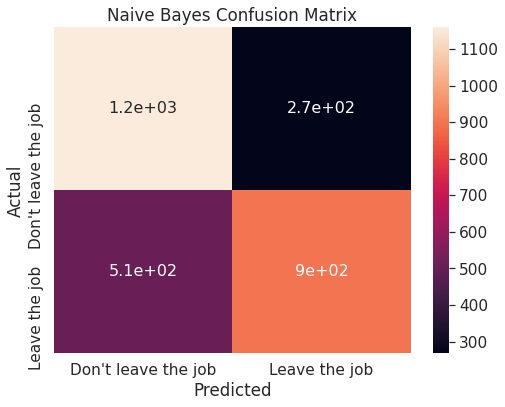

In [ ]:
accuracy =  accuracy_score(y_val,y_pred)*100
print(accuracy)

#confusion matrix
cm = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},xticklabels=["Don't leave the job", "Leave the job"], yticklabels=["Don't leave the job", "Leave the job"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

We can notice that the accuracy increased slightly.

Let's try now without balancing the data.

[0.10003055 0.21660852 0.02193968 0.0141013  0.02448683 0.02944013
 0.02046521 0.14276507 0.10573962 0.04395898 0.06959804 0.21086607]


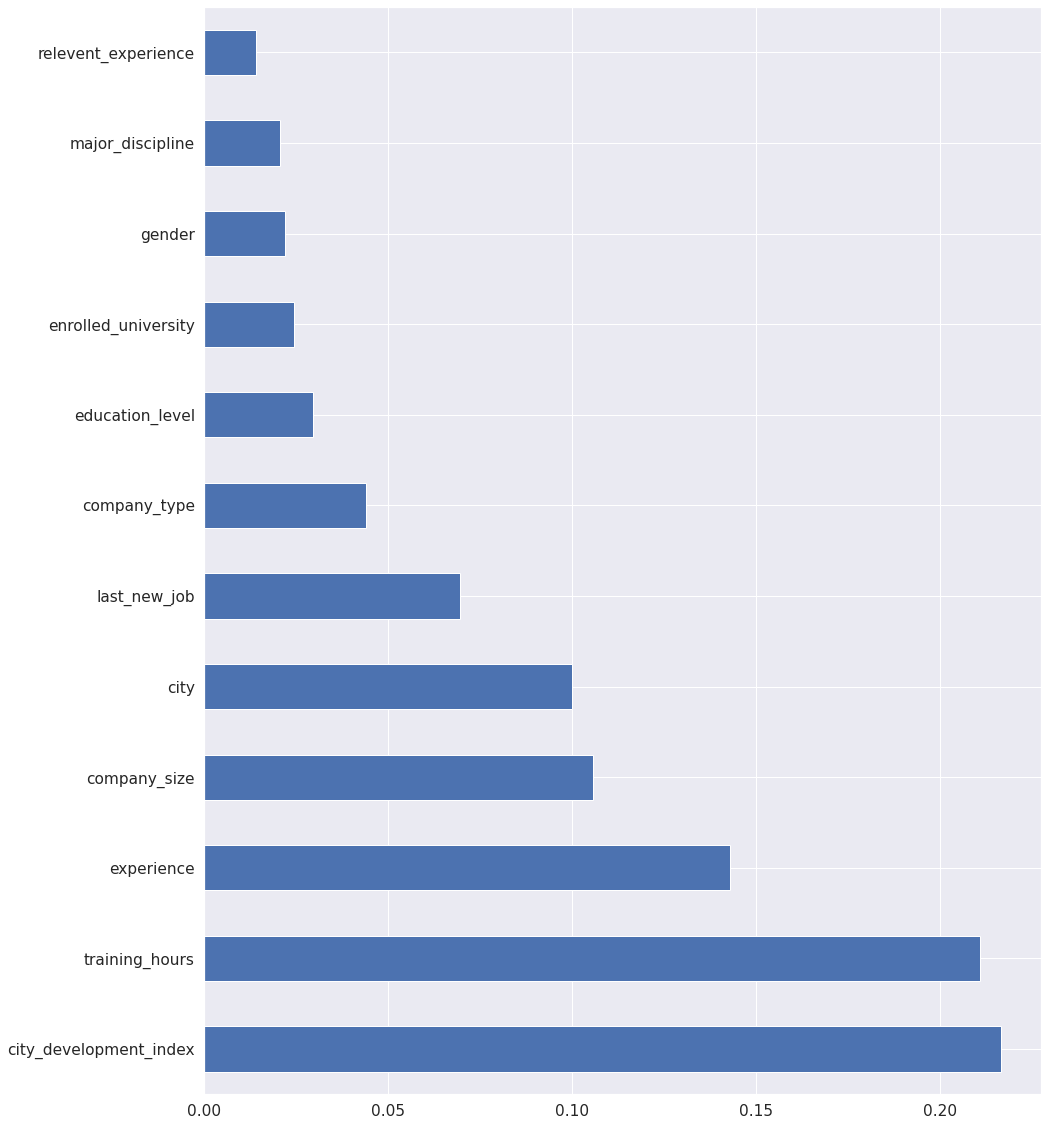

In [ ]:
#Let's tale X_train and y_train as they were after preprocessing

X_train = df_train.drop(columns='target') 
y_train = df_train['target']

#without smote

# feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(X_train,y_train)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [ ]:
#Let's take the three most important features to define X_train
X_train = X_train[['city_development_index','training_hours','experience']] 

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_val)
accuracy =  accuracy_score(y_val,y_pred)*100

print(y_pred)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(accuracy)

[0 1 0 ... 0 0 0]
[[1272  148]
 [ 127  152]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1420
           1       0.51      0.54      0.53       279

    accuracy                           0.84      1699
   macro avg       0.71      0.72      0.71      1699
weighted avg       0.84      0.84      0.84      1699

83.81400824014126


locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f5b53564c88>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f5b53564c88>
Setting pcolormesh


83.81400824014126


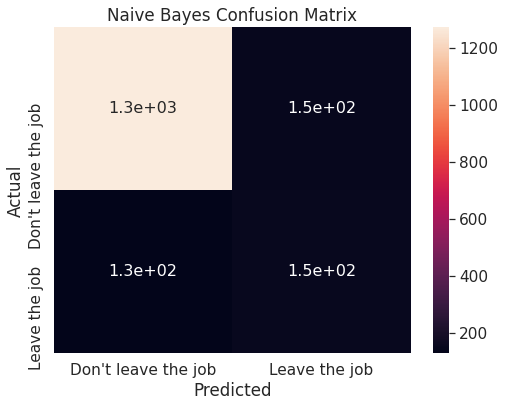

In [ ]:
accuracy =  accuracy_score(y_val,y_pred)*100
print(accuracy)

#confusion matrix
cm = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},xticklabels=["Don't leave the job", "Leave the job"], yticklabels=["Don't leave the job", "Leave the job"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

**There is a great increase in accuracy. Indeed, one of the strengths of naive bayes is that it handles well problems where the data is imbalanced.**

### REGRESSION: Logistic Regression



#### [Regression] Label Encoder for Categorical Variables


Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. 

We can observe that there are ordinal (rank order) and nominal (non-rank order) independent variables.

<center><img src="https://miro.medium.com/max/386/1*Yp6r7m82IoSnnZDPpDpYNw.png" width="500"></center>

**Create dummy variables**

In [ ]:
# Get dummies
# To get all categorical variable: df_train.select_dtypes(include=["category","object"]).columns
categorical_variables = ['city', 'relevent_experience','gender','enrolled_university','education_level','major_discipline','experience_categorical','company_size','company_type','last_new_job_categorical']
try:
    df_train = pd.get_dummies(data=df_train, columns=categorical_variables)
except (ValueError, KeyError) as e:
    print("We already got dummies for our dataset.")
df_train.head()

We already got dummies for our dataset.


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,40,0.776,1,0,0,0,-1,15.0,75,0,6,47,0
4,162,0.767,1,1,0,1,-1,28.0,75,-1,4,8,0
7,46,0.762,1,1,0,0,-1,13.0,5,0,6,18,1
8,103,0.920,1,1,0,0,-1,7.0,75,0,1,46,1
11,103,0.920,1,1,0,0,-1,5.0,7500,0,1,108,0


#### [Regression] Data Augmentation for Imbalanced Data

**Prepare X_train and y_train**

In [ ]:
X_train = df_train.drop(columns='target')
y_train = df_train['target']

**Balance dataset**

In [ ]:
print('X_train original shape:')
print(X_train.shape)
print('\ny_train original shape:')
print(y_train.shape)

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=0)
X_resampled, y_train = smote.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_resampled, columns=X_train.columns)

# summarize the new class distribution
counter = Counter(y_train)
print('\nCounter for y_train: ' + str(counter))

print('\nX_train rebalanced shape:')
print(X_train.shape)
y_train = y_train.reshape(-1, 1)
print('\ny_train rebalanced shape:')
print(y_train.shape)

X_train original shape:
(8493, 12)

y_train original shape:
(8493,)

Counter for y_train: Counter({0: 7088, 1: 7088})

X_train rebalanced shape:
(14176, 12)

y_train rebalanced shape:
(14176, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### [Regression] Divide data into test an training set

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print('Training:')
print(X_train.shape)
print(y_train.shape)
print('\nValidation: ')
print(X_val.shape)
print(y_val.shape)

Training:
(11340, 12)
(11340, 1)

Validation: 
(2836, 12)
(2836, 1)


#### [Regression] Data Normalization

In [ ]:
#standard socre of a sample x is z = (x - u) / s where u is the mean and s is the standard deviation
Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
X_val = Sc.fit_transform(X_val)
X_train #has been scaled

array([[-1.0333434 ,  0.73424589,  0.33268264, ..., -0.34822569,
         0.29953783, -1.09628207],
       [ 1.37957893,  0.71934809,  0.33268264, ..., -1.09137951,
        -0.23317898, -0.11771249],
       [ 0.6749202 ,  0.89067282,  0.33268264, ..., -1.09137951,
        -0.76589579, -0.85760656],
       ...,
       [-1.07604999, -1.31420194,  0.33268264, ..., -0.34822569,
        -0.76589579, -0.05480755],
       [-1.07604999, -1.31420194,  0.33268264, ..., -0.60825779,
         0.13961994, -0.02461522],
       [ 1.87070472,  0.31710743, -2.93839961, ..., -0.34822569,
         0.83225465, -0.26091779]])

#### [Regression] Compute Logistic Regression

In [ ]:
# Please make sure to increase the default iteration number 
Lr = LogisticRegression(max_iter=9999)
Lr.fit(X_train,np.ravel(y_train,order='C'))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=9999,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = Lr.predict(X_val)

prediction_repartition = collections.Counter(y_pred)
print(prediction_repartition)

Counter({0: 1641, 1: 1195})


#### [Regression] Print model performances

In [ ]:
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(Lr.score(X_val, y_val)))
#print(Lr.intercept_)
#print(pd.DataFrame(Lr.coef_[0]))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Accuracy of logistic regression classifier on validation set: 0.73
Mean Squared Error: 0.27468265162200284
Root Mean Squared Error: 0.5241017569346652


Text(25.5, 0.5, 'True Values')

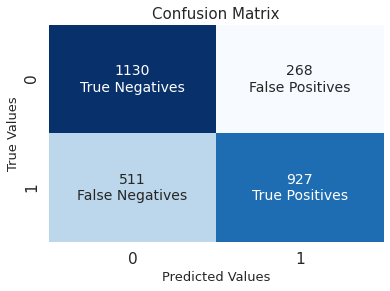

In [ ]:
#compute confusion matrix
confusionmatrix = confusion_matrix(y_val, y_pred)

#plot confusion matrix with seaborn
ax = sns.heatmap(confusionmatrix, annot=True, cmap='Blues', cbar=False, annot_kws={"size": 14}, fmt='g')
cmlabels = ['True Negatives', 'False Positives','False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=15)
plt.xlabel('Predicted Values', size=13)
plt.ylabel('True Values', size=13)
#this confusion matrix tells us that there are 1252 + 950 = 2202 good predictions and 146+488 = 634 false predictions

The Confusion Matrix describes the predictions that the model made as either True or False. Here we can see that the model is quite good because we have 1130+927 good predictions againts 511+268 wrong predictions. Moreover we can notice that we have well-handled the imbalance problem we are dealing with because the Negatives and Positives are almost in the same propotions.

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74      1398
           1       0.78      0.64      0.70      1438

    accuracy                           0.73      2836
   macro avg       0.73      0.73      0.72      2836
weighted avg       0.73      0.73      0.72      2836



[Regression] ROC Curve & Dsitribution of predictions

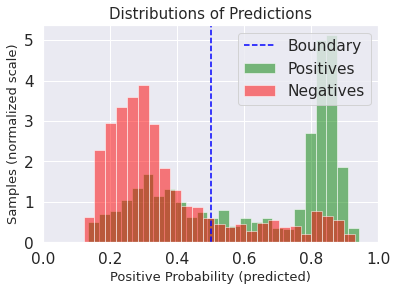

In [ ]:
y_val = y_val.reshape(y_val.shape[0])
labels=['Positives','Negatives']
p = Lr.predict_proba(X_val)
if len(Lr.classes_)!=2:
    raise ValueError('A binary class problem is required')
if Lr.classes_[1] == 1:
    pos_p = p[:,1]
elif Lr.classes_[0] == 1:
    pos_p = p[:,0]

df = pd.DataFrame({'probPos':pos_p, 'target': y_val})
plt.hist(df[df.target==1].probPos, density=True, bins=25,
             alpha=.5, color='green',  label=labels[0])
plt.hist(df[df.target==0].probPos, density=True, bins=25,
             alpha=.5, color='red', label=labels[1])
plt.axvline(.5, color='blue', linestyle='--', label='Boundary')
plt.xlim([0,1])
plt.title('Distributions of Predictions', size=15)
plt.xlabel('Positive Probability (predicted)', size=13)
plt.ylabel('Samples (normalized scale)', size=13)
plt.legend(loc="upper right")

The Center Graph is the distribution of predicted probabilities of a Positive Outcome. The two different colors indicate the True class, not the predicted class. The overlap shows the wrong predictions. The decision boundary decides the model’s final predictions. In scikit-learn, the default decision boundary is .5; that is, anything above .5 is predicted as a 1 (positive) and anything below .5 is predicted as a 0 (negative). The interpretation is the same as for the confusion matrix.

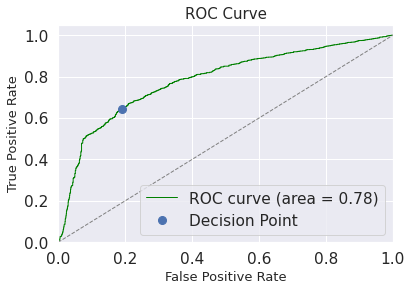

In [ ]:
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.
fp_rates, tp_rates, _ = roc_curve(y_val,p[:,1])
roc_auc = auc(fp_rates, tp_rates)
plt.plot(fp_rates, tp_rates, color='green',lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=1, linestyle='--', color='grey')
#plot current decision point:
tn, fp, fn, tp = [i for i in confusionmatrix.ravel()]
plt.plot(fp/(fp+tn), tp/(tp+fn), 'bo', markersize=8, label='Decision Point')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.title('ROC Curve', size=15)
plt.legend(loc="lower right")
plt.show()

The Receiver Operating Characteristic (ROC) curve describes all possible decision boundaries. The green curve represents the possibilities, and the trade off between the True Positive Rate and the False Positive Rate at different decision points. The Blue dot represents the .5 decision boundary that is currently determining the Confusion Matrix. We can observe that our model is not perfect but quite good. In fact, a perfect model would be a vertical line up the y-axis (100% True Positives, 0% False Positives)...

### CLUSTERING: K-Means

#### [K-Means] Scale the data

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

#### [K-Means] Cluster tendency assessment

##### Hopkins Test

In [ ]:
from pyclustertend import hopkins
hopkins(X_train, 2000)

0.14162814844275107

The hopkins score is close to 0; there is a **high cluster tendency**.

##### With K-Means and a silhouette score
Assess the clusterability of a dataset using KMeans algorithm and a metric score, the best cluster number is the number that best scored with the silhouette score.

In [ ]:
from pyclustertend import assess_tendency_by_metric
assess_tendency_by_metric(X_train, n_cluster=10, metric='silhouette')

(8, array([0.13393602, 0.14859537, 0.13970981, 0.13949923, 0.14149288,
        0.14448189, 0.15356374, 0.14431737, 0.14097837]))

**8** is the **number of cluster** that best scored on the **silhouette score on Kmeans**.

The silhouette score for each number of cluster on KMeans: [0.13393602, 0.14859537, 0.13970981, 0.13949923, 0.14149288, 0.14448189, 0.15356374, 0.14431737, 0.14097837]

##### VAT (Visual Assesement of Tendency)

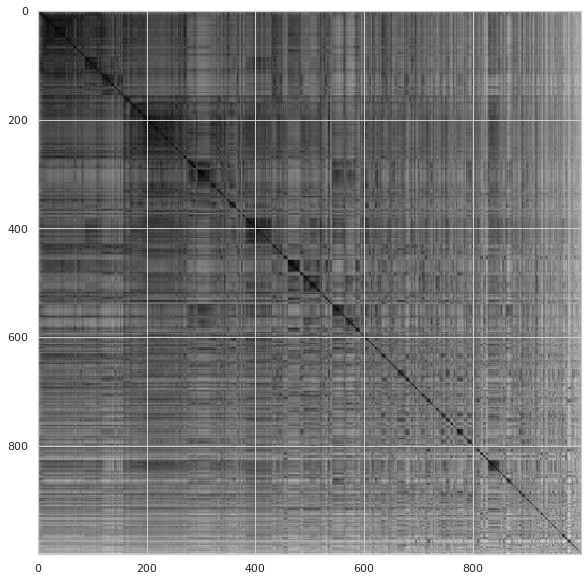

In [ ]:
from pyclustertend import vat
vat(X_train[:1000,:])

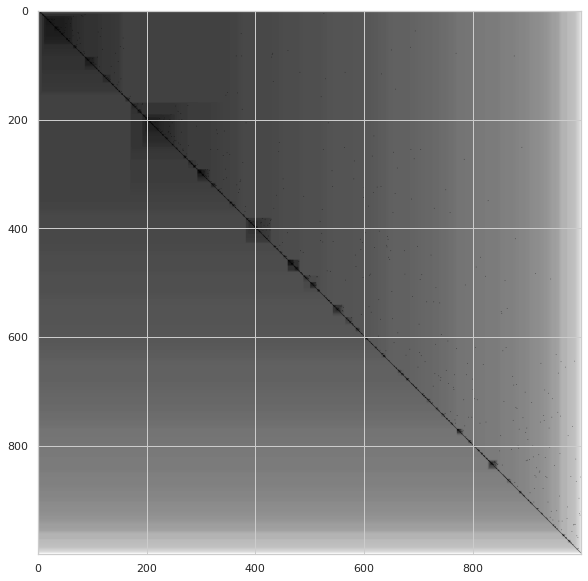

In [ ]:
from pyclustertend import ivat
ivat(X_train[:1000,:])

#### [K-Means] Apply clustering

Now that we know that we have a high clustering tendency.

Let's try to manually find the best number of clusters from 1 to 15.

kmeans_pattern
[7 5 5 ... 1 1 4]
cluster_centers_
[[ 0.34788213  0.44834954  0.18226807 -0.22408602 -0.14839315 -0.16766265
   3.56869331 -0.021071   -0.06527881 -0.00600336  0.05490962  0.01421225]
 [-0.93897999 -1.2761176   0.23938876  0.33347534  0.29041558 -0.13400059
  -0.26709049 -0.60388985 -0.4798205  -0.19320872 -0.422853   -0.0088898 ]
 [ 0.01294873 -0.11261813  0.15739636 -2.54663073  0.32482794 -0.25789714
  -0.20086343 -0.49181014  0.06588717  0.01869246 -0.29880206 -0.08939896]
 [ 0.32698404  0.64804017  0.30544189  0.33775512 -0.19154283  0.20114216
  -0.24044574  1.39308208 -0.16337464 -0.33301567  1.10130644 -0.03718738]
 [ 0.23674408  0.28931017 -3.08025913 -0.09370469 -0.19246373  0.05547056
   0.07748323 -0.13499002 -0.0649029  -0.12011106 -0.05115838  0.04691546]
 [ 0.54205815  0.56279368  0.29586989  0.38006914 -0.16037242 -0.12846408
  -0.24916677 -0.2617386  -0.46098668 -0.35909452 -0.42352639  0.03629102]
 [ 0.38779168  0.48852641  0.06061868 -0.43280603  0.073

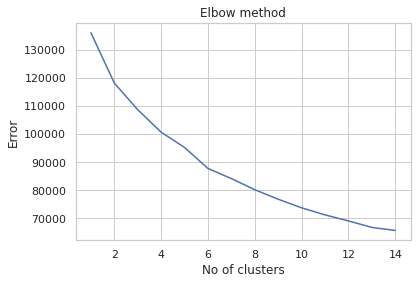

In [ ]:
Error =[]
MAX_CLUSTERS_NUMBER = 15
for i in range(1, MAX_CLUSTERS_NUMBER):
    kmeans = KMeans(n_clusters = i).fit(X_train)
    kmeans.fit(X_train)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, MAX_CLUSTERS_NUMBER), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Let's apply clustering assuming 8 clusters (from the cluster tendency assessment part).

In [ ]:
kmeans_cluster = KMeans(n_clusters=8)
kmeans_pattern = kmeans_cluster.fit_predict(X_train)
print('kmeans_pattern')
print(kmeans_pattern)
print('cluster_centers_')
print(kmeans_cluster.cluster_centers_)

kmeans_pattern
[7 8 8 ... 1 1 3]
cluster_centers_
[[ 3.70599905e-01  6.32188370e-01  3.01670517e-01  3.05944913e-01
  -2.18115274e-01 -4.70474631e-02 -2.41954557e-01  1.17562385e+00
   9.87358601e-02 -3.01877597e-01  1.73488112e+00 -9.80502872e-02]
 [-9.52150658e-01 -1.30387361e+00  2.38456220e-01  3.33914669e-01
   2.96451267e-01 -1.45866363e-01 -2.63805140e-01 -6.38695856e-01
  -4.81088258e-01 -2.03796035e-01 -4.56168261e-01 -2.58482091e-01]
 [-4.19184094e-02 -4.45526654e-02  2.52145366e-01  2.93692650e-01
   1.72269521e-01 -2.20391638e-01 -2.55164679e-01 -1.74051977e-01
  -3.45978380e-01 -2.39152613e-01 -1.82797940e-01  1.90023820e+00]
 [ 2.07975817e-01  2.15879150e-01 -3.11006709e+00 -1.00319041e-01
  -1.88239335e-01  1.71651368e-02 -1.65444623e-01 -1.48029139e-01
  -3.64446112e-02 -1.09504292e-01 -3.74253916e-02  3.81324034e-03]
 [ 3.96544027e-01  4.91470105e-01  8.20715958e-02 -4.80601172e-01
   7.57219854e-02  6.56754375e-01 -6.16720028e-02  2.77923662e-01
   4.33259429e-02  2.7

#### [K-Means] Cluster validation

0.14287338939876465
0.14287338939876465


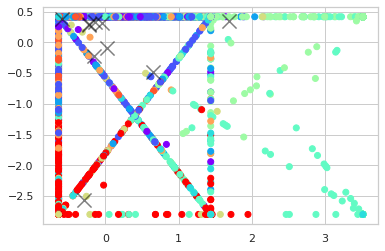

In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(X_train, kmeans_pattern))

X_train = pd.DataFrame(X_train)
plt.scatter(X_train.iloc[:, 5], X_train.iloc[:, 3], c=kmeans_pattern, cmap='rainbow')
centers = kmeans_cluster.cluster_centers_
plt.scatter(centers[:, 5], centers[:, 3], c='black', s=200, alpha=0.5,marker='x')

#https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/

#import scipy.cluster.hierarchy as sch
#Z = sch.linkage(X, method = 'ward')
#den = sch.dendrogram(Z)
#plt.title('Dendrogram')
#plt.xlabel('X')
#plt.ylabel('Clusters');
#plt.show()

print(silhouette_score(X_train, kmeans_pattern))

#y_pred = getClusterAssignments(X, den)


In [ ]:
print(silhouette_score(X_train, kmeans_pattern))

0.14287338939876465


It seams that we have overlapping clusters.

### Neural Networks

#### [NN] Data Scaling

As usal, let's scale our data.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

**MLP**

For this algorithm, we are going to use the MLPClassifier model from sklearn.neural_network. 

MLP stands for Multi-layer Perceptron 

Multi-layer Perceptron is a supervised learning algorithm that learns a function by training on a dataset. Given a set of features and a target, it can learn a non-linear function approximator for either classification or regression. Here we will use classification because our problem suggests it to use it. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. It will be a hyperparameter that we will adjust later.

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Firstly, we implement a very basic instance of MLPClassifier. Let's print the confusion matrix and accuracy for this fisrt model. Afterwards, we will set up hyperparameters to enhance the accuracy of our model.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
accuracy =  accuracy_score(y_val,y_pred)*100
print(accuracy)

[[1174  224]
 [ 313 1125]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1398
           1       0.83      0.78      0.81      1438

    accuracy                           0.81      2836
   macro avg       0.81      0.81      0.81      2836
weighted avg       0.81      0.81      0.81      2836

81.06488011283498


#### [NN] Hyperparameters optimizations

Our accuracy is not so bad : almost 82%

Let's try to do better by choosing the best set of hyperparameters. To do so, we will use GridSearchCV.

In [ ]:
mlp_gs = MLPClassifier(max_iter=1000, activa)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001],
    }
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_g

Let's print the best parameters found.

In [ ]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}


We can observe that the best activation function is 'tanh' and the best value of alpha is .0001. Regardind the solver, we will use 'adam' wich is widely use in neural networks algotihms.

Now, we will see wich hidden layer sizes is the best between four propositions.

In [ ]:
mlp_gs2 = MLPClassifier(max_iter=10000, activation='tanh', alpha=0.0001, solver='adam')
parameter_space = {
    'hidden_layer_sizes': [(10,10,10),(50,50,50),(100,100,100),(500,500,500)]
    }
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs2, parameter_space)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='tanh', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=10000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_

In [ ]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'hidden_layer_sizes': (500, 500, 500)}


It seems that the more hidden layers the better. We could still add more but we have to take into account the execution time. It seems that (500,500,500) is a good tradeoff

#### [NN] Train the best model

Let's train the best model.

In [ ]:
mlp_final = MLPClassifier(hidden_layer_sizes=(500, 500, 500),max_iter=10000, activation='tanh', alpha=0.0001, solver='adam')
mlp_final.fit(X_train, y_train)
y_pred = mlp_final.predict(X_val)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
accuracy =  accuracy_score(y_val,y_pred)*100
print(accuracy)

[[1200  198]
 [ 119 1319]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1398
           1       0.87      0.92      0.89      1438

    accuracy                           0.89      2836
   macro avg       0.89      0.89      0.89      2836
weighted avg       0.89      0.89      0.89      2836

88.82228490832158


By adjusting the different hyperparameters, we can see that we were able to considerably increase the accuracy to such an extent that this is our best score! Moreover with this set of hyperparameters, it seems that there is not overfitting.

### Support Vector Machine

#### [SVM] Data Scaling

As usual, we scale our data.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

**SVM**

SVM stands for Support Vector Machine.

In SVM, the line that is used to separate the classes is referred to as hyperplane. The data points on either side of the hyperplane that are closest to the hyperplane are called Support Vectors which is used to plot the boundary line.

In SVM Classification, the data can be either linear or non-linear. There are different kernels that can be set in an SVM Classifier. For a linear dataset, we can set the kernel as 'linear'.
On the other hand, for a non-linear dataset, there are two kernels, namely 'rbf' and 'polynomial'. In this, the data is mapped to a higher dimension which makes it easier to draw the hyperplane. Afterwards, it is brought down to the lower dimension. In this section we are going to use the SVC model from scikit learn and try diffenrent kernels to see which one is the best for our data

#### [SVM] Implement SVClassifier with different kernel types

Linear kernel

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_val)

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
accuracy =  accuracy_score(y_val,y_pred)*100
print(accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

Sigmoid kernel

In [ ]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_val)

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
accuracy =  accuracy_score(y_val,y_pred)*100
print(accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[881 517]
 [563 875]]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      1398
           1       0.63      0.61      0.62      1438

    accuracy                           0.62      2836
   macro avg       0.62      0.62      0.62      2836
weighted avg       0.62      0.62      0.62      2836

61.918194640338506


Polynomial kernel

In [ ]:
svclassifier = SVC(kernel='poly') 
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_val)

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
accuracy =  accuracy_score(y_val,y_pred)*100
print(accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1148  250]
 [ 413 1025]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1398
           1       0.80      0.71      0.76      1438

    accuracy                           0.77      2836
   macro avg       0.77      0.77      0.77      2836
weighted avg       0.77      0.77      0.77      2836

76.62200282087447


Rbf kernel

In [ ]:
svclassifier = SVC(kernel='rbf') 
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_val)

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
accuracy =  accuracy_score(y_val,y_pred)*100
print(accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1251  147]
 [ 363 1075]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1398
           1       0.88      0.75      0.81      1438

    accuracy                           0.82      2836
   macro avg       0.83      0.82      0.82      2836
weighted avg       0.83      0.82      0.82      2836

82.01692524682652


The best accuracy is reached with the “rbf” kernel which stands for Radial Basis Function.

#### [SVM] Vizualisation

Let's now visualize the results of the SVM Classification model on a graph that is plotted along with the two regions : 0 and 1 (not looking for a new position / looking for a new positions)

In [ ]:
X_train = df_train.drop(columns='target')
y_train = df_train['target']

X_train = X_train[['city_development_index','last_new_job']] #we use two features in order to realize the vizualisation

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


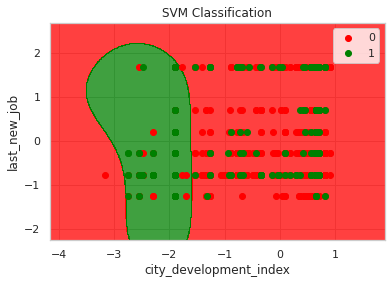

In [ ]:
from matplotlib.colors import ListedColormap

svclassifier = SVC(kernel='rbf') 
svclassifier.fit(X_train, y_train)

X_set, y_set = X_val, y_val
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svclassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification')
plt.xlabel('city_development_index')
plt.ylabel('last_new_job')
plt.legend()
plt.show()

In this plot, there are two regions. The Red region denotes 0, and the Green region denotes 1. As we have chosen a non-linear kernel (rbf), we are getting regions that are not separated by a linear line.
If you notice, we can see a lot of wrongly classified data points in the test set with the difference in color in the specific region. It show that the SVM doesn't fit very well our data.

## 2.6 Deployment

You can find below some useful links to explore our deployment regarding this project. Please read the "How it works" page for a better understanding.

1. GitHub: https://github.com/sebastienmascha/data-science-viz-streamlit-hr-analytics
2. WebSite: https://hr-analytics.smascha.ai
3. API: https://hr-api.smascha.ai/docs
